# Exploring the Residual Network (ResNet) Architecture

<br>

1. **Introduction - Research Question, Data, Summary**
1. **Data Preparation**
1. **Investigating Claim 1 - Batch Normalization**
1. **Investigating Claim 2 - Shortcut Connections**
1. **Investigating Claim 3 - Identity Mappings**
1. **Potential Improvement to Original ResNet Models - Dropout**
1. **Conclusion**
1. **References**


## 1) Introduction - Research Question, Data, Summary
Deep neural network architecture has been (and still is) an active field of research particularly for convolutional neural networks (CNNs), largely due to its capability in enriching the "levels" of features by the number of stacked layers (depth). It arguably started gaining traction around 2012, when the AlexNet architecture (8 layers) was introduced. Then, a series of deeper architectures were developed, starting with VGG (16/ 19 layers) in 2014, followed by  several versions of the Inception/ GoogLeNet architecture (22 layers) between 2014 and 2015. 


These models all used deep neural networks whereby some of them stacked many convolutional layers one after the other, while some stacked modules/ blocks within which are convolutional layers. Given their promising results, deeper neural networks are seen to be performing better. However, there are several problems with really deep neural networks:

* they are more difficult to train/ optimize;
* simply stacking more layers will likely lead to vanishing/ exploding gradients, hampering convergence from the beginning;
* degradation issue - as network depth increases, accuracy becomes saturated and then degrades rapidly.

In 2015, Microsoft Research published a paper titled "Deep Residual Learning for Image Recognition" which suggested the use of Residual Networks to ease optimization and tackle the degradation issue. The vanishing/ exploding gradients problem has largely been addressed by Batch Normalization (BN), and is part of the Residual Network architecture (prior to them, GoogLeNet has also explored BN in their architecture). They achieved tremendous improvements in the training of really deep neural networks (going as deep as 152 layers on ImageNet dataset, and up to 1000 layers on CIFAR-10 dataset), and even won 1st place in the ILSVRC 2015 classification task. 


### 1.1 Research Questions
This report aims to investigate the claims made in the original paper as well as their subsequent paper "Identity Mappings in Deep Residual Networks", by exploring the different components of the architectures presented in both papers. Then, this report aims to further explore potential improvements to the ResNet architecture by introducing more regularization via Dropout. Below are our research questions corresponding to the claims made by the authors of the ResNet papers:

* **Claim 1: Batch Normalization**
    * Does merely adding BN to a CNN architecture help to achieve higher test accuracy, while providing training speedup? 
    * How does adding BN help in training models with higher learning rates?   

* **Claim 2: Shortcut Connections**
    * Does using shortcut connections help in overcoming the degradation problem and thus enabling accuracy gains from considerably increased depth? 
    * Are residual networks easier to optimize than their corresponding plain networks as network depth increases?
    
* **Claim 3: Identity Mappings**
    * In addition to having shortcut connections, does having identity mapping help to ease optimization further and reduce risk of overfitting (regularization) in much deeper neural networks?
    
* **Potential Improvement: Dropout**
    * Can stronger regularization such as Dropout help in improving the ResNet architecture? 
    * What are the impacts of different levels of Dropout rates on model performance?     


### 1.2 Data
The data used to evaluate the various claims stated in Section 1.1 is the CIFAR-10 dataset, which contains tiny images collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton. This dataset consists of 60,000 32x32 colour images in 10 classes, with 6,000 images per class. Of these, 50,000 of the images are training images and the remaining 10,000 are test images. The test dataset contains exactly 1,000 randomly-selected images from each of the 10 classes. The training dataset contains the remaining images in random order, with exactly 5,000 images from each class. The 10 classes are airplane, automobile, bird, cat, deer, dog, frog, horse, ship and truck. The 10 classes are completely mutually exclusive - it is worth noting that there is no overlap between automobiles and trucks. The class "Automobile" includes vehicles such as sedans, SUVs, etc. whereas "Truck" only includes big trucks. Neither class includes pickup trucks. 

This dataset is one of the most widely used datasets for machine learning research, particularly for benchmarking algorithms developed to solve image classification/ object recognition tasks. Since the images in this dataset are low-resolution (32x32), it allows researches to explore different algorithms rather quickly compared to other datasets with much higher image resolutions. Since the aim of this report is to explore the various components of ResNet architecture to evaluate the claims made as stated in Section 1.1 instead of building a CNN model to explore a new topic of interest, this CIFAR-10 dataset is just right. This is because it still has some complexity with respect to structure and volume without requiring too much computational power to analyse, compared to a bigger standard dataset such as Imagenet. Given the resources at hand, and to fulfil the aims of this report which would require building very deep neural networks (up to 110 layers) in order to evaluate the claims, CIFAR-10 is a good option. 


### 1.3 Summary of Findings
In our first analysis, we found that adding BN to a CNN architecture does provide training speedup, largely due to the technique's ability to reduce the Internal Covariate Shift problem by normalizing layer inputs for each training mini-batch. BN also introduces noise to the data since normalization is performed just on the mini-batches instead of the whole dataset, resulting in some form of regularization, which then helps in reducing generalization error and giving better test accuracy. Finally, we found that adding BN helps in training models with higher learning rates, as BackPropagation through a layer is unaffected by the scale of its parameters for a model with BN. 

We then discovered in our second analysis that using shortcut connections helps in overcoming the degradation problem, thus enabling accuracy gains from considerably increased depth. The degradation problem started appearing in the "plain" networks as the model becomes considerably deeper (reduced test accuracy as depth increases), but the corresponding ResNet architecture continued to enjoy improvements in test accuracies as the models become deeper. Besides, we found that ResNets are easier to optimize than their "plain" network counterparts, especially as network depth increases, suggesting that indeed, the shortcut connections ease optimization further as network depth increases. 

Moving to our third analysis, we found that in addition to having shortcut connections, having identity mapping helps to ease optimization further in much deeper neural networks, as signals can be propagated directly between any two units. In our model with depth = 110, we saw that the presence of identity mapping eases optimization further, especially during the beginning of training. We also discovered that identity mapping helps in reducing the risk of overfitting through the introduction of more regularization. This then improved our model's test accuracy. 

In our final analysis, we found that introducing Dropout does help in improving the performance of the ResNet architecture, although caution must be exercised when choosing the Dropout rate ($p$) - $p$ should not be "too high" as this may impact the model's performance negatively. We found that introducing Dropout and rearranging the layers in the residual unit to "ReLU-BN-Dropout-Convolutional" have resulted in training speedup, improved regularization which leads to a more stable training process, and better test performance. 

We also experimented with different values of $p$ and found our best-performing model overall, i.e. ResNet model with depth = 110 and $p$ = 10% that gave a test accuracy of 93.25%. The experiment also gave a useful insight - too high of a $p$ (in our case, 30%) can lead to worse model performance, suggesting the importance of tuning the parameter $p$, especially when Dropout is used alongside BN. Overall, we found that if the right $p$ is chosen, the presence of Dropout alongside BN does reduce overfitting further and improve generalisability. This is especially useful for really deep models, for which overfitting may start to become an issue. 

<br>

**Begin with importing all the required modules as below:**

In [1]:
%tensorflow_version 2.x
import tensorflow
print(tensorflow.__version__)
from __future__ import print_function
import tensorflow.keras
from tensorflow.keras.layers import Dense, Conv2D, BatchNormalization, Activation, Dropout
from tensorflow.keras.layers import AveragePooling2D, Input, Flatten, MaxPooling2D
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
from six.moves import cPickle
import os
import time

2.2.0-rc3


## 2) Data Preparation

Since the CIFAR-10 dataset is a cleaned dataset available in tensorflow.keras with a predetermined train/test split, we can straight away load the data as our training and test data, and visualize part of the data, to have a clearer idea of the data that we are dealing with. The function written below enables visualizing the images alongside their labels.  

170500096/170498071 [==============================] - 5s 0us/step


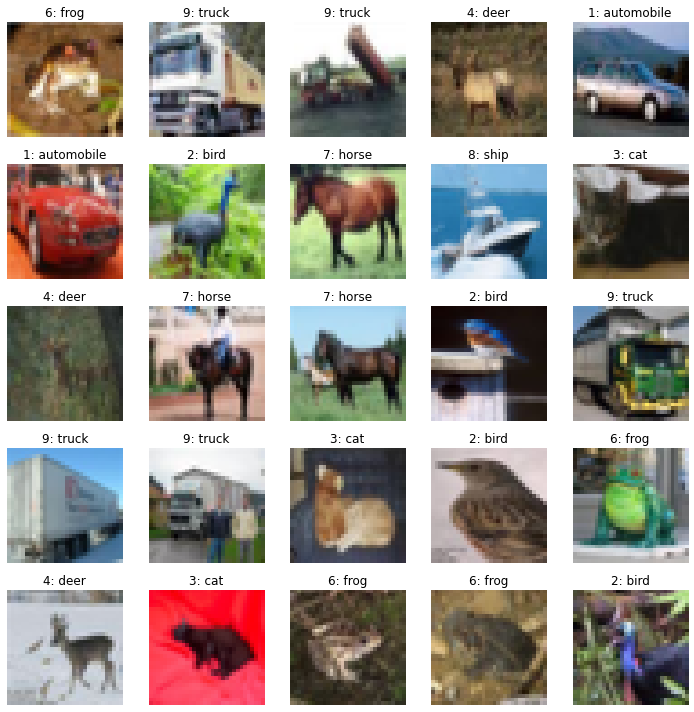

In [0]:
%matplotlib inline

# Load the CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


# Name the 10 labels for this dataset
CIFAR10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
                  'horse', 'ship', 'truck']


# Write a function to visualize some of the images in the dataset
def visualize_image(x_train, y_train, row, col, scale=3., list_label=None):
    '''
    Plots visualizations of the image data, alongside the labels for the images.
    '''
    fig_width = x_train[0].shape[0] / 80 * row * scale
    fig_height = x_train[0].shape[1] / 80 * col * scale
    fig, axes = plt.subplots(row, col, figsize=(fig_height, fig_width))
    
    for i in range(row * col):
        image = x_train[i]
        index_label = y_train[i][0]
        image = image.transpose(0, 1, 2)
        r, c = divmod(i, col)
        axes[r][c].imshow(image)  
        if list_label is None:
            axes[r][c].set_title('label {}'.format(index_label))
        else:
            axes[r][c].set_title('{}: {}'.format(index_label, list_label[index_label]))
        # exclude axis value for cleaner visualization
        axes[r][c].axis('off')  
    # padding between subplots
    plt.tight_layout()   


# Display the visualization
visualize_image(x_train, y_train, 5, 5, scale=5., list_label=CIFAR10_labels)

As the images are of 32x32 resolution, visualizing them in a bigger grid as above causes the images to be blurry. Nonetheless, now that we have an idea of how the images look like, we can prepare them for analysis. 


First, it is always a good practice to normalize the images by transforming them to range between 0 and 1 (inclusive). The reason why this is a good practice is somewhat related to the activation functions that we use. To illustrate, the ReLU activation function (which we will be using throughout this report) takes an input value and outputs another value that ranges from 0 to infinity. If the input value is relatively large, the output value increases linearly, but when the input value is relatively small, the output value reaches reaches 0 easily. Since with image data, values range from 0 to 255, when they are passed into the ReLU function, the output may be very large. Thus, when back-propagation is conducted to optimize the network, it could lead to exploding/ vanishing gradient problems. To avoid this problem, we normalize the images to be between 0 and 1. 


Next, one-hot encoding is performed on the labels. In order to be able to compare our model's predictions (a set of probabilities for each class of image) with the ground truth labels, we reshape the label data to a vector of size 10 (number of classes) whereby the value 1 is assigned to the actual class and 0's are assigned to the rest of the classes. Below are the steps taken and a summary of the reshaped images and labels.

In [0]:
# Input image dimensions for training later
input_shape = x_train.shape[1:]

# Normalize the image data 
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Perform one-hot encoding
y_train = tensorflow.keras.utils.to_categorical(y_train, 10)
y_test = tensorflow.keras.utils.to_categorical(y_test, 10)

# Print the shapes of training data and the number of samples
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 10)
50000 train samples
10000 test samples


Before beginning with the main part of the analysis, several functions are defined to ease plotting results in the analyses to follow, as well as a function written to create a learning rate schedule that will be used alongside callbacks in the analyses of Claim 2 onwards. This practice follows the idea in [3] which is slightly different but conceptually still similar to the original ResNet paper [1] whereby the learning rate starts from 0.1 and is divided by 10 when the error plateaus. Here, we decrease the learning rate at  80, 120, 160 and 180 epochs, to align with our number of epochs, which is 200. 

In [0]:
# Plot accuracy
def plot_accuracy(title, list_1, list_2, list_3=[], list_4=[], general=True, training=False):
  '''
  Given lists of accuracy values and a title, plots the elements in the lists 
  and assigns a title to the plot, depending on whether the setting
  is general or more specific.
  '''
  if general:
    plt.plot(list_1, 'b--')
    plt.plot(list_2, 'b-')
    plt.plot(list_3, 'r--')
    plt.plot(list_4, 'r-')
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
  else:
    if training:
      plt.plot(list_1, 'b--')
      plt.plot(list_2, 'r--')
      plt.plot(list_3, 'g--')
      plt.plot(list_4, 'y--')
      plt.ylabel('Training Accuracy')
    else:
      plt.plot(list_1, 'b-')
      plt.plot(list_2, 'r-')
      plt.plot(list_3, 'g-')
      plt.plot(list_4, 'y-')
      plt.ylabel('Test Accuracy')
    plt.title(title)
    plt.xlabel('Epoch')


# Plot loss
def plot_loss(title, list_1, list_2, list_3=[], list_4=[], general=True, training=False):
  '''
  Given lists of loss values and a title, plots the elements in the lists and 
  assigns a title to the plot, depending on whether the setting is general or 
  more specific.
  '''
  if general:
    plt.plot(list_1, 'b--')
    plt.plot(list_2, 'b-')
    plt.plot(list_3, 'r--')
    plt.plot(list_4, 'r-')
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
  else:
    if training:
      plt.plot(list_1, 'b--')
      plt.plot(list_2, 'r--')
      plt.plot(list_3, 'g--')
      plt.plot(list_4, 'y--')
      plt.ylabel('Training Loss')
    else:
      plt.plot(list_1, 'b-')
      plt.plot(list_2, 'r-')
      plt.plot(list_3, 'g-')
      plt.plot(list_4, 'y-')
      plt.ylabel('Test Loss')
    plt.title(title)
    plt.xlabel('Epoch')


# Learning Rate schedule that will be used to test Claim 2 onwards
def learning_rate_schedule(epoch):
  '''
  Schedule learning rates to be reduced after 80, 120, 160, 180 epochs.
  This function will be called automatically every epoch during training,
  as part of callbacks. The argument epoch is the number of epochs (integer).
  Returns a learning rate in the format of float32.
  '''
  learning_rate = 1e-3
  if epoch > 180:
    learning_rate *= 0.5e-3
  elif epoch > 160:
    learning_rate *= 1e-3
  elif epoch > 120:
    learning_rate *= 1e-2
  elif epoch > 80:
    learning_rate *= 1e-1
  print('Learning rate: ', learning_rate)
  return learning_rate

## 3) Investigating Claim 1 - Batch Normalization 
One of the prime architectural components used in the ResNet models is the Batch Normalization layer. Both versions of ResNet architectures [1] & [2] utilize this layer to further accelerate the training of these deep neural networks and for regularization purposes. The ResNet architectures even skipped using Dropout as a regularizer, consistent with the original BN paper's [4] claim that using BN can eliminate or reduce the need for Dropout. 

This leads us to study the claims made in the original BN paper [4], where the authors claim:
1. Merely adding BN to an image classification model yields a substantial speedup in training.
1. BN helps in achieving higher test/ validation accuracy.
1. BN enables using much higher learning rates and be less careful about initialization.


### Methods and Parameter Settings
To evaluate the first 2 claims, we decided to build 2 models - one baseline model without any BN layer, and another model identical to the baseline model, with additional BN layers. Going back to the original ResNet paper [1], since the authors used the VGG architecture as their baseline, we'll use a smaller VGG model (specifically, VGG8 - 6 convolutional layers and 2 dense layers) as our baseline model. 


The model with BN is then created by inserting BN layers after each ReLU activated convolutional layer. The optimizer used is Stochastic Gradient Descent (SGD) with momentum of 0.9, just like in [1]. The learning rate used is 0.001 for both baseline and BN models. The size of the filters used are made smaller in scale starting from 16, but the main design of VGG is still maintained - within each stack of 2 convolutional layers and max pooling layer, the convolutional layers have the same number of filters, and as we move to the next stack, we double the filter size. All convolutional layers have 3x3 filters, the weights are initialized using uniform distribution, and zero padding is used. The loss being optimized is the cross-entropy loss.


To evaluate the third claim, we repeat a similar analysis as above, but with learning rate increased to 0.1, and the kernel initializer used is switched to 'he_normal' as recommended in [1], which utilizes truncated normal distribution - it is also a convention to use normal initialization alongside BN. Thus, there are altogether 4 models - 2 baseline models and 2 BN models, with each type having learning rates of 0.001 and 0.1. It is important to note that we are not aiming to achieve state-of-the-art performance through these models, but rather observe the trends in training and test performances over training epochs, to evaluate the claims. Below are the two functions written to create the baseline and BN models respectively.

In [0]:
# Define the baseline model without Batch Normalization
def claim_1_baseline(learning_rate=0.001):
	model = Sequential()
	model.add(Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_uniform', 
                     padding='same', input_shape=input_shape))
	model.add(Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_uniform', 
                     padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', 
                     padding='same'))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', 
                     padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', 
                     padding='same'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', 
                     padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=learning_rate, momentum=0.9, nesterov=True)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model


# Define the model with Batch Normalization
def claim_1_BN(learning_rate=0.001):
	model = Sequential()
	model.add(Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', 
                     padding='same', input_shape=input_shape))
	model.add(BatchNormalization())
	model.add(Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', 
                     padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', 
                     padding='same'))
	model.add(BatchNormalization())
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', 
                     padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', 
                     padding='same'))
	model.add(BatchNormalization())
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', 
                     padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
	model.add(BatchNormalization())
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=learning_rate, momentum=0.9, nesterov=True)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model


# Create 4 models:
# 2 baseline models with learning rate = 0.001 and 0.1
# 2 models with Batch Normalization with learning rate = 0.001 and 0.1
model_claim_1_baseline_1 = claim_1_baseline()
model_claim_1_baseline_2 = claim_1_baseline(learning_rate = 0.1)
model_claim_1_BN_1 = claim_1_BN()
model_claim_1_BN_2 = claim_1_BN(learning_rate = 0.1)

#model_claim_1_baseline_1.summary()
#model_claim_1_baseline_2.summary()
#model_claim_1_BN_1.summary()
#model_claim_1_BN_2.summary()

After the models are created, they are trained as below, with batch size = 64 and training epochs set to 150 for all 4 models. The training data is also shuffled before each epoch. 

In [0]:
# Train baseline model 1 - with learning rate = 0.001
history_model_claim_1_baseline_1 = model_claim_1_baseline_1.fit(x_train, y_train, 
                                                            batch_size=64, epochs=150, 
                                                            validation_data=(x_test, y_test), 
                                                            shuffle=True)
    
# Train Batch Normalization model 1 - with learning rate = 0.001
history_model_claim_1_BN_1 = model_claim_1_BN_1.fit(x_train, y_train, 
                                                    batch_size=64, epochs=150, 
                                                    validation_data=(x_test, y_test), 
                                                    shuffle=True)

# Train baseline model 2 - with learning rate = 0.1
history_model_claim_1_baseline_2 = model_claim_1_baseline_2.fit(x_train, y_train, 
                                                            batch_size=64, epochs=150, 
                                                            validation_data=(x_test, y_test), 
                                                            shuffle=True)

# Train Batch Normalization model 2 - with learning rate = 0.1
history_model_claim_1_BN_2 = model_claim_1_BN_2.fit(x_train, y_train, 
                                                    batch_size=64, epochs=150, 
                                                    validation_data=(x_test, y_test), 
                                                    shuffle=True)

Once the models are trained, the training and test loss/ accuracy over the training epochs are plotted as below, to enable us to evaluate the 3 claims thoroughly. 

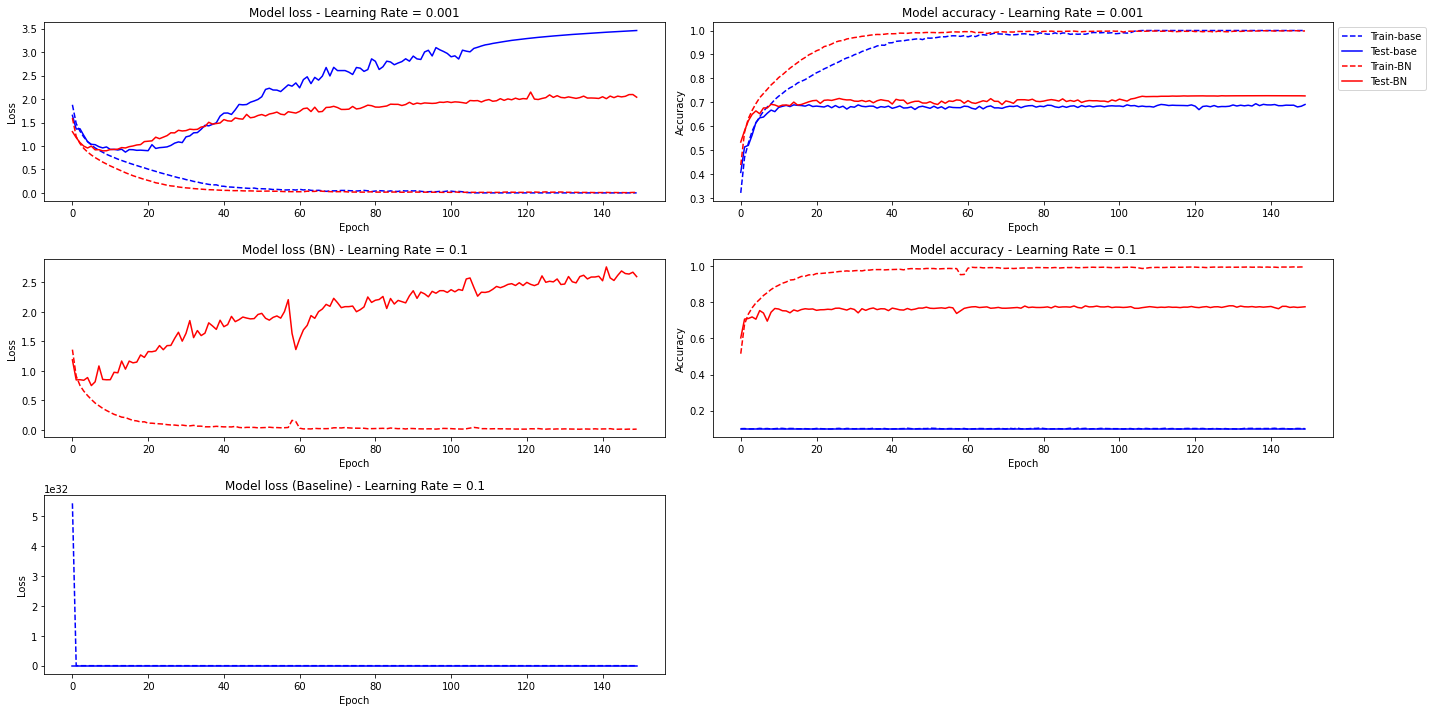

In [3]:
# Plot training & test accuracy / loss values for both learning rates and both model types
plt.figure(figsize=(20,10))
plt.subplot(3, 2, 1)
plot_loss('Model loss - Learning Rate = 0.001',
          history_model_claim_1_baseline_1.history['loss'],
          history_model_claim_1_baseline_1.history['val_loss'],
          history_model_claim_1_BN_1.history['loss'],
          history_model_claim_1_BN_1.history['val_loss'])

plt.subplot(3, 2, 2)
plot_accuracy('Model accuracy - Learning Rate = 0.001',
              history_model_claim_1_baseline_1.history['accuracy'],
              history_model_claim_1_baseline_1.history['val_accuracy'],
              history_model_claim_1_BN_1.history['accuracy'],
              history_model_claim_1_BN_1.history['val_accuracy'])
plt.legend(['Train-base', 'Test-base', 'Train-BN', 'Test-BN'], bbox_to_anchor=(1, 1))

plt.subplot(3, 2, 3)
plt.plot(history_model_claim_1_BN_2.history['loss'], 'r--')
plt.plot(history_model_claim_1_BN_2.history['val_loss'], 'r-')
plt.title('Model loss (BN) - Learning Rate = 0.1')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.subplot(3, 2, 4)
plot_accuracy('Model accuracy - Learning Rate = 0.1',
              history_model_claim_1_baseline_2.history['accuracy'],
              history_model_claim_1_baseline_2.history['val_accuracy'],
              history_model_claim_1_BN_2.history['accuracy'],
              history_model_claim_1_BN_2.history['val_accuracy'])

plt.subplot(3, 2, 5)
plt.plot(history_model_claim_1_baseline_2.history['loss'], 'b--')
plt.plot(history_model_claim_1_baseline_2.history['val_loss'], 'b-')
plt.title('Model loss (Baseline) - Learning Rate = 0.1')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.tight_layout()
plt.show()

### Observations
#### Claims 1 & 2
1. Looking at the first line of plots (model loss and accuracy for learning rate = 0.001), we can easily spot that indeed, the presence of Batch Normalization speeds up training rather significantly. The training loss and accuracy curves show that the presence of BN speeds up training by more than 20 epochs - the training loss/ accuracy started to converge at the 40th epoch for the model with BN, but it took more than 60 epochs for the baseline model to converge.
1. Still on the first line of plots, if we look at the RHS plot with test accuracies for both baseline and BN models, the results suggest that indeed, the presence of BN helps in achieving higher test accuracy. This is also related to the test loss curves on the LHS plot, showing the regularization effect of BN. Clearly, the model is still in need of more regularization to address the rapid overfitting of the test dataset, such as data augmentation, learning rate schedules, changes to batch size, etc., but since our focus is just to observe the effect of BN and not achieve state-of-the-art results, we will explore these extra regularizations in the next section. However, we can still see that the test loss for the baseline model keeps increasing whereas the BN model's test loss, despite increasing as well, is increasing at a much lower rate and is almost converging at the end. 
1. The first 2 observations above corroborate the first 2 claims made by the BN paper [4] that adding BN to an image classification model can yield a substantial speedup in training, and it also helps in achieving higher test/ validation accuracy.

#### Claim 3
1. Indeed, we can see in the last plot (for the baseline model with learning rate = 0.1) that the training loss drops rapidly from an extremely high value in the first epoch to a really low value (around 2) in the second epoch, and the loss remains stuck at that position afterwards. This suggests that the learning rate is too big for this model and it is unable to find a good solution, which also explains the stagnant training and test accuracy curves for the same baseline model in the fourth plot (Model accuracy - Learning Rate = 0.1) which are stuck at a value close to 0.
1. However, using the same settings but with the presence of BN, we are able to train the model and achieve decent results. With the exception of the rapid overfitting (discussed in Claims 1 & 2) as observed in the test loss curve in the third plot (Model loss (BN) - Learning Rate = 0.1), the training curve is still able to converge as before. This BN model with the higher learning rate also managed to achieve a slightly higher test accuracy compared to the BN model with learning rate = 0.001. 
1. These observations suggest that indeed, using BN enables us to use a much higher learning rate while being less careful about initialization. We did not add any extra regularizers compared to the BN model with the lower learning rate, but are still able to train the BN model with a high learning rate well, something that we are unable to do in the model without BN.


### Theory and Explanation
Now that we have made our observations and have corroborated the claims made in the BN paper [4], below are the theory and reasonings behind what we have observed. 

**1) How does it provide training speedup?**


The BackPropagation algorithm is used for neural networks to learn - the neurons learn the errors they make and then correct their "weights" and "biases", as simplified in the image below.

<br>

<img src="image/backpropagation.png" width="500" height="500" />

<br>

However, this process causes the distribution of each layer's input to change during training, as the previous layers' parameters change. This phenomenon is known as the *Internal Covariate Shift* problem, that slows down training by requiring lower learning rates and careful parameter initialization. Below is a visualization of the problem.

<br>

<img src="image/internalcovariate.png" width="500" height="500" />

<br>

As observed above, the second layer has adjusted its weights and biases, but this readjustment causes the output of the second layer which is also the input of the third layer to change for the same initial input. Thus, the third layer has to start over its learning process to generate the right outputs for the same data. Because of this, layers have to start learning after its previous layer has finished learning. For really deep neural networks, this will take ages to train, as visualized below.

<br>

<img src="image/slowlearning.png" width="500" height="500" />

<br>

Batch Normalization is a technique introduced to reduce this *Internal Covariate Shift* problem, by normalizing layer inputs. This method draws its strength from making normalization a part of the model architecture and conducting the normalization for each training mini-batch, thus the name Batch Normalization. Below is an image of how BN is applied to the network.

<br>

<img src="image/batchnorm.png" width="500" height="500" />

<br>

These normalization layers between the fully connected layers result in the range of each layer's input distribution to stay the same regardless of the changes in the previous layer. Given $x$ inputs from the k-th neuron, we have:

$\hat{x}^{(k)}=\frac{x^{(k)} - E[x^{(k)}]}{\sqrt{Var[x^{(k)}]}}$

Normalization causes all inputs to be centered around 0, thus there is not much change in the input of each layer. This way, layers in the network are able to learn from the BackPropagation process simultaneously, without the need to wait for the previous layer to finish learning first. Such normalization speeds up convergence, even when the features are not decorrelated, and this is how Batch Normalization speeds up the training of networks. 

<br>

**2) How does it improve test accuracy?**


Apart from speeding up the training of neural networks, BN also provides a form of regularization. Since the normalization is performed just on the mini-batches instead of the whole dataset, they act as noise, and this introduction of noise to the data can result in regularization. Training with BN causes a training example to be seen in conjunction with other examples in the mini-batch, and the training network no longer produces deterministic values for a given training example.


However, BN provides a weak form of regularization, and this regularization is particularly more effective when the batch size is small. This explains why it cannot be fully relied upon to avoid overfitting, which is still present in our models with BN. Nonetheless, this provision of some regularization helps in reducing generalization error, thus resulting in better test accuracy, as observed in our analysis above. 

<br>

**3) How does it enable using much higher learning rates?**


Too high of a learning rate may result in exploding or vanishing gradients, or getting stuck in poor local minima, especially in deep networks - we saw how the high learning rate in our baseline model resulted in its poor performance. By normalizing activations throughout the network, BN prevents small changes to the parameters from amplifying into larger and suboptimal changes in activations in gradients. 


BN also helps in making training more resilient to the parameter scale. Typically, large learning rates would increase the scale of layer parameters, which then amplify the gradient during backpropagation. This may lead to model explosion. However, BackPropagation through a layer is unaffected by the scale of its parameters for a model with BN. For a scalar $a$ and learned parameters of the model $W$, we have:


BN($Wu$) = BN$((aW)u)$


and we can also show:

$\frac{\partial {BN((aW)u)}}{\partial u} = \frac{\partial {BN(Wu)}}{\partial u}$

$\frac{\partial {BN((aW)u)}}{\partial {aW}} = \frac{1}{a} [\frac{\partial {BN(Wu)}}{\partial W}]$


From the equations above, we can see that the scale does not affect the layer Jacobian nor the gradient propagation consequently. Furthermore, larger weights lead to smaller gradients and BN will stabilize the parameter growth. This is how we are able to use much higher learning rates with BN, without worrying about vanishing/ exploding gradient problem. 

## 4) Investigating Claim 2 - Shortcut Connections
The main architectural component that the ResNet paper [1] used and claimed to be the main contribution to their success in overcoming the degradation problem is the shortcut/ skip connection. Besides successfully overcoming the degradation issue that was hindering the use of very deep CNN among practitioners/ researchers, the authors also claimed to have obtained accuracy gains from considerably increased network depth. Comparing the ResNet models to their "plain" counterparts (exactly the same architecture as the ResNet model but without the skip connections), the authors claimed that the former is easier to optimize than the latter, particularly as network depth increases. 


### Shortcut Connections - Building Blocks
Given these claims, let's have a closer look at the main building block of the model, i.e. the residual block with a skip connection. The images below show the same residual block, but the image on the right is included for the sake of completion, as the image on the left does not include BN, when in actual construction of the ResNet, BN is always added before ReLU. 


<img src="image/shortcut.png" width="500" height="500" />

<br>

Authors of [1] suggest that instead of hoping each few stacked layers to fit a desired underlying mapping, it is better to let these layers fit a residual mapping. Thus, if we denote the underlying mapping as $H(x)$, we let the stacked nonlinear layers fit another mapping of $F(x) := H(x) - x$. Thus, we can recast the original mapping into $F(x) + x$. 

The reformulation of $F(x) + x$ is motivated by the counterintuitive phenomena about the degradation problem. [1] If added layers can be constructed as identity mappings, a deeper model should not have training error greater than its shallower counterpart. The degradation problem implies that the solvers might experience difficulties in approximating identity mappings by multiple nonlinear layers.

They suggested it is easier to optimize the residual mapping than the original, unreferenced mapping - if identity mapping is optimal, it would be easier to push the residual to 0 than to fit an identity mapping by a stack of nonlinear layers. 

This $F(x) + x$ formulation is the one visualized in the image above - it can be realized by feedforward neural networks with shortcut connections, i.e. those skipping one or more layers (the curved arrow on the left image). These shortcut connections simply perform identity mapping, with their outputs being added to the outputs of the stacked layers. 


### General Architecture
Next, let's have a closer look at the general architecture of ResNet, and the design that inspired its baseline model. As mentioned earlier, the authors of [1] made their claims by comparing the ResNet model with different depths to their "plain" counterparts. The "plain" baseline models are inspired by the VGG nets (left-most model in image below), whereby the convolutional layers mostly have 3x3 filters and follow 2 design rules - (i) the layers have the same number of filters for the same output feature map size, and (ii) the number of filters is doubled as the feature map size is halved to preserve time complexity per layer. Downsampling is performed directly by convolutional layers with stride of 2. At the end, there is a global average pooling layer and a 1000-way fully-connected layer with softmax. Their 34-layer "plain" baseline model (middle model in image below) has even fewer filters and lower complexity than the left-most VGG-19 model. 


The residual network architecture (right-most model in the image below) is based on the "plain" network's architecture, but with shortcut connections inserted. The solid line arrows represent identity shortcut connections, which can be directly used when the input and output are of the same dimensions. However, when the dimensions increase (dotted line arrows), there are two implementation options - (i) the shortcut still performs identity mapping with extra zero entries padded for increasing dimensions, or (ii) projection shortcut done by 1x1 convolutions to match dimensions. The equation for projection shortcut is given by:
$y$ = $F(x$, {$W_i$}) + $W_sx$, whereby $F(x$, {$W_i$}) is the residual mapping to be learned, and $W_s$ is a linear projection. In this report, we will be using identity shortcuts whenever possible and only use these shortcut projections to match dimensions, to contain the complexity of the model.


<img src="image/resnet_architecture.png" width="300" height="300" />

<br>

### Methods and General Settings
To evaluate the claims above, 6 models are built - 3 "plain" models and 3 ResNet models with depths of 8, 20 and 38 for each type. Depth here refers to the total number of stacked weighted layers, which according to the configuration in [1], equals to 6$n$ + 2 layers. Thus, depths of 8, 20 and 38 correspond to n = 1, 3 and 6 respectively. The table below summarizes the architecture that we use in this report (as coded in the next code cell), which aligns with the architecture used in [1]. 

| output map size | 32x32 | 16x16 | 8x8 |
| --- | --- | --- | --- |
| Number of layers | 1+2$n$ | 2$n$ | 2$n$ |
| Number of filters | 16 | 32 | 64 |


Our implementation follows very closely the implementation in the original ResNet paper [1]. Below are several aspects of implementation worth highlighting (the rest are mostly explained in the codes):
1. We use data augmentation which has a regularizing effect as it expands the training dataset, enabling the model to learn the same general features, although in a more generalized manner. Given that the dataset is comprised of low resolution small images, it is not a good idea to use augmentation that distorts the images too much, so that we can preserve and use the useful features in the images. Thus, in our models, we implement a simple augmentation with horizontal flips and 10% shifts in the width and height of the images. 
1. BN is adopted right after each convolution and before ReLU activation. 'he_normal' is used as kernel initializer as done in Section 3, following the convention and [1]. Weight decay (l2 norm) of 0.0001 is also applied like in [1]. We also subtracted the per-pixel mean to center each pixel, as done in [1]. 
1. The training of both "plain" and residual networks are done following a learning rate schedule described in Section 2, in order to schedule the decrease in learning rate at 80, 120, 160 and 180 epochs from the default 1e-3. The learning_rate_schedule function defined in Section 2 will be called after every epoch during training as part of the callbacks variable.
1. A minor difference from the original implementation of ResNet is that here, we don't use SGD, but instead use Adam, as ResNets are easier to converge with Adam [3]. 


In the next code cell are three functions written to build the ResNet as well as the "plain" models:
1. **building_block** - a highly cutomizable function that enables building the basic blocks of either Convolutional/BN/ReLU combination as used to investigate this claim, or BN/ReLU/Convolutional combination to investigate the next claim in Section 5, or just a single Convolutional layer. 
1. **resnet_1** - a function to build the ResNet architecture from scratch using the building_block function alongside other customizations. 
1. **plain_model** - a function to build the exact same architecture as the ResNet model, but without the skip connections. 


Details are as commented in the code cell below:

In [0]:
# Define a function to build a block that consists of a convolution layer,
# Batch Normalization, and an activation - this will serve as a building block 
# for both ResNet models and 'Plain' models. We try to make this function as customizable
# as possible, to ease building the final models, including ResNet Version 2 that   
# we will explore in Claim 3.

def building_block(inputs, num_filters=16, kernel_size=3, strides=1, activation='relu',
                   batch_normalization=True, conv_first=True):
  '''
  Arguments:
    inputs (tensor): input from input image or previous layer
    num_filters (integer): number of filters used for Conv2D
    kernel_size (integer): kernel dimensions for Conv2D
    strides (integer): stride dimensions for Conv2D
    activation (string): name of activation used
    batch_normalization (bool): True - include Batch Normalization, False - otherwise
    conv_first (bool): True - conv-bn-activation or False - bn-activation-conv 

  Returns a tensor x as input for the next layer.
  '''
  # the original paper [1] used 'he_normal' as the kernel initializer, which draws 
  # samples from a truncated normal distribution - this kernel initializer is typically 
  # used alongside Batch Normalization. The paper also quoted using weight regularizer,
  # which is again what we are using here. 
  convol = Conv2D(num_filters,
                  kernel_size=kernel_size,
                  strides=strides,
                  padding='same',
                  kernel_initializer='he_normal', 
                  kernel_regularizer=l2(1e-4))  

  x = inputs
  if conv_first:
    x = convol(x)
    if batch_normalization:
      x = BatchNormalization()(x)
    if activation is not None:
      x = Activation(activation)(x)
  else:
    if batch_normalization:
      x = BatchNormalization()(x)
    if activation is not None:
      x = Activation(activation)(x)
    x = convol(x)
  return x



# Define a function to build the ResNet model (Version 1), using the building_block
# defined above, with other building features following the original paper [1].

def resnet_1(input_shape, depth, num_classes=10):
    '''
    This function builds the first version of the ResNet model as described 
    in the original paper [1]. Here, we use identity skip connections whenever 
    possible and only use projection shortcuts to match dimensions 
    (done by 1x1 convolutions).

    Here, there are 2 x (3 x 3) Conv2D - BN - ReLU and the last ReLU is inserted 
    after the shortcut connection. At the start of each stage, we will halve the 
    feature map size (downsample) by a convolutional layer with strides=2, when
    the number of filters is doubled, so as to preserve the time complexity per
    layer. The layers have the same number filters and the same filter map sizes 
    within the same stage. 
    
    Features maps sizes:
    stage 0: 32x32, 16
    stage 1: 16x16, 32
    stage 2:  8x8,  64

    Takes as arguments:
    input_shape (tensor): shape of input image tensor
    depth (integer): no. of core convolutional layers
    num_classes (integer): no. of classes (CIFAR-10 has 10)

    Returns model (Model).
    '''
    
    # Check that the depth inputted is acceptable according to paper [1]
    if (depth - 2) % 6 != 0:
        raise ValueError('depth should be 6n+2 (eg. 20, 32, 44)')
    # Build model
    num_filters = 16
    num_res_blocks = int((depth - 2) / 6)

    inputs = Input(shape=input_shape)
    x = building_block(inputs=inputs)

    # Iterate through the 3 stages and the number of residual blocks 
    # (also known as n in paper [1])
    for stage in range(3):
        for resi_block in range(num_res_blocks):
            strides = 1
            if stage > 0 and resi_block == 0:  # first layer of all stages except the first stage
                strides = 2  # downsample
            y = building_block(inputs=x,
                               num_filters=num_filters,
                               strides=strides)
            y = building_block(inputs=y,
                               num_filters=num_filters,
                               activation=None)  # add first before applying activation
            if stage > 0 and resi_block == 0:  # first layer of all stages except the first stage
                # perform linear projection residual shortcut connection using
                # 1x1 convolution to match changed dimensions
                x = building_block(inputs=x,
                                   num_filters=num_filters,
                                   kernel_size=1,
                                   strides=strides,
                                   activation=None,
                                   batch_normalization=False)
            # addition to implement the skip connection
            x = tensorflow.keras.layers.add([x, y])
            # apply activation before looping again
            x = Activation('relu')(x)
        # as we go to the next stage, we double num_filters
        num_filters *= 2

    # add average pooling layer before flattening and including the final dense layer
    x = AveragePooling2D(pool_size=8)(x)
    y = Flatten()(x)
    outputs = Dense(num_classes, activation='softmax', kernel_initializer='he_normal')(y)

    # instantiate model
    model = Model(inputs=inputs, outputs=outputs)
    return model



# Define a function to build the 'Plain' model using the building_block
# defined above, with similar architecture as the ResNet 1 model, except for 
# the skip connections.

def plain_model(input_shape, depth, num_classes=10):
    '''
    This function builds the plain model to be used as a comparison to highlight
    the importance of having skip connections as published in the original ResNet 
    paper [1].

    Here, the architecture is similar to the one in resnet_1, except that there
    are no skip connections. At the start of each stage, we will halve the 
    feature map size (downsample) by a convolutional layer with strides=2, when
    the number of filters is doubled, so as to preserve the time complexity per
    layer. The layers have the same number filters and the same filter map sizes 
    within the same stage. 
    
    Features maps sizes:
    stage 0: 32x32, 16
    stage 1: 16x16, 32
    stage 2:  8x8,  64

    Takes as arguments:
    input_shape (tensor): shape of input image tensor
    depth (integer): no. of core convolutional layers
    num_classes (integer): no. of classes (CIFAR-10 has 10)

    Returns model (Model).
    '''
    
    # Check that the depth inputted is acceptable according to paper [1]
    # so that we are making fair comparison with the ResNet model
    if (depth - 2) % 6 != 0:
        raise ValueError('depth should be 6n+2 (eg. 20, 32, 44)')
    # Build model
    num_filters = 16
    num_res_blocks = int((depth - 2) / 6)

    inputs = Input(shape=input_shape)
    x = building_block(inputs=inputs)

    # Iterate through the 3 stages and the number of residual blocks 
    # (also known as n in paper [1])
    for stage in range(3):
        for resi_block in range(num_res_blocks):
            strides = 1
            if stage > 0 and resi_block == 0:  # first layer of all stages except the first stage
                strides = 2  # downsample
            y = building_block(inputs=x,
                               num_filters=num_filters,
                               strides=strides)
            x = building_block(inputs=y,
                               num_filters=num_filters)  
            
        # as we go to the next stage, we double num_filters
        num_filters *= 2

    # add average pooling layer before flattening and including the final dense layer
    x = AveragePooling2D(pool_size=8)(x)
    y = Flatten()(x)
    outputs = Dense(num_classes, activation='softmax', kernel_initializer='he_normal')(y)

    # instantiate model
    model = Model(inputs=inputs, outputs=outputs)
    return model

Given that we have defined the functions to build the ResNet and "plain" models, we can train all 6 of them. The next 6 code cells are the codes used to train the 6 models, beginning with ResNet8, ResNet20 and ResNet38, followed by Plain8, Plain20 and Plain38 with the numbers corresponding to the depths of the networks. 


The batch size used across all models is 32, and each model is trained across 200 epochs. Loss function being optimized is the cross-entropy loss. The verbosity is set to 1 here, to ease supervising the training process, but the outputs of each cell are cleared, to ensure the presentation of this report is neat. The summaries showing parameter details for each layer is also cleared as they tend to get really long, especially for the deeper models. However, a summary table will be included at the end of this analysis to highlight the number of parameters for each model and their performances. 

In [0]:
### Train ResNet8 ###

# Define training parameters
batch_size = 32  
epochs = 200 
num_classes = 10
depth = 8
subtract_pixel_mean = True 

# Perform subtract pixel mean on the x_train and x_test if it is set to True
if subtract_pixel_mean:
    x_train_mean = np.mean(x_train, axis=0)
    x_train -= x_train_mean
    x_test -= x_train_mean


# Define the model  
model_claim_2_resnet8 = resnet_1(input_shape=input_shape, depth=depth)

# Compile the model
# Using Adam as optimizer with the learning_rate schedule as defined earlier
model_claim_2_resnet8.compile(loss='categorical_crossentropy',
                              optimizer=Adam(lr=learning_rate_schedule(0)),
                              metrics=['accuracy', 'top_k_categorical_accuracy'])
#model_claim_2_resnet8.summary()


# Prepare callbacks for learning rate adjustment
learning_rate_scheduler = LearningRateScheduler(learning_rate_schedule)

# This causes it to reduce the learning rate until we plateau
learning_rate_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),   
                                          cooldown=0, patience=5, min_lr=0.5e-6)

callbacks = [learning_rate_reducer, learning_rate_scheduler]


# Run training with image augmentation, which can be useful to not overfit 
# the data that it has. While doing augmentation, can distort it in various 
# ways as it trains, so it's like getting brand new images each time, 
# but they're all based on the training set images.
# Here, given that the CIFAR-10 dataset consists of small object photos, we have to be careful
# with performing augmentation so that it does not distort the images too much, 
# because we want to preserve and use the useful features in the images. 
# Here, we will implement simple augmentation - horizontal flips and 10% shifts 
# in the width and height of the image.

# Perform preprocessing and realtime data augmentation
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1,
                             horizontal_flip=True, data_format=None)

# Fit our model on the batches generated by datagen.flow()
history_model_claim_2_resnet8 = model_claim_2_resnet8.fit_generator(datagen.flow(x_train, y_train, 
                                            batch_size=batch_size),
                                            steps_per_epoch= int(x_train.shape[0] / batch_size),
                                            validation_data=(x_test, y_test),
                                            epochs=epochs, 
                                            verbose=1, 
                                            workers=1,
                                            callbacks=callbacks, 
                                            use_multiprocessing=False)

In [0]:
### Train ResNet20 ###

# Define new depth
depth = 20

# Define the model  
model_claim_2_resnet20 = resnet_1(input_shape=input_shape, depth=depth)

# Compile the model
model_claim_2_resnet20.compile(loss='categorical_crossentropy',
                               optimizer=Adam(lr=learning_rate_schedule(0)),
                               metrics=['accuracy', 'top_k_categorical_accuracy'])
#model_claim_2_resnet20.summary()

# Use the same settings as above
# Fit our model on the batches generated by datagen.flow()
history_model_claim_2_resnet20 = model_claim_2_resnet20.fit_generator(datagen.flow(x_train, 
                                        y_train, batch_size=batch_size),
                                        steps_per_epoch= int(x_train.shape[0] / batch_size),
                                        validation_data=(x_test, y_test),
                                        epochs=epochs, 
                                        verbose=1, 
                                        workers=1,
                                        callbacks=callbacks, 
                                        use_multiprocessing=False)

In [0]:
### Train ResNet38 ###

# Define new depth
depth = 38

# Define the model  
model_claim_2_resnet38 = resnet_1(input_shape=input_shape, depth=depth)

# Compile the model
model_claim_2_resnet38.compile(loss='categorical_crossentropy',
                               optimizer=Adam(lr=learning_rate_schedule(0)),
                               metrics=['accuracy', 'top_k_categorical_accuracy'])
#model_claim_2_resnet38.summary()

# Use the same settings as above
# Fit our model on the batches generated by datagen.flow()
history_model_claim_2_resnet38 = model_claim_2_resnet38.fit_generator(datagen.flow(x_train, 
                                        y_train, batch_size=batch_size),
                                        steps_per_epoch= int(x_train.shape[0] / batch_size),
                                        validation_data=(x_test, y_test),
                                        epochs=epochs, 
                                        verbose=1, 
                                        workers=1,
                                        callbacks=callbacks, 
                                        use_multiprocessing=False)

In [0]:
### Train Plain8 ###

# Define depth (all other training parameters are still the same as above)
depth = 8

# Define the model  
model_claim_2_plain8 = plain_model(input_shape=input_shape, depth=depth)

# Compile the model
model_claim_2_plain8.compile(loss='categorical_crossentropy',
                             optimizer=Adam(lr=learning_rate_schedule(0)),
                             metrics=['accuracy', 'top_k_categorical_accuracy'])
#model_claim_2_plain8.summary()

# Use the same settings as above
# Fit our model on the batches generated by datagen.flow()
history_model_claim_2_plain8 = model_claim_2_plain8.fit_generator(datagen.flow(x_train, y_train, 
                                            batch_size=batch_size),
                                            steps_per_epoch= int(x_train.shape[0] / batch_size),
                                            validation_data=(x_test, y_test),
                                            epochs=epochs, 
                                            verbose=1, 
                                            workers=1,
                                            callbacks=callbacks, 
                                            use_multiprocessing=False)

In [0]:
### Train Plain20 ###

# Define new depth
depth = 20

# Define the model  
model_claim_2_plain20 = plain_model(input_shape=input_shape, depth=depth)

# Compile the model
model_claim_2_plain20.compile(loss='categorical_crossentropy',
                             optimizer=Adam(lr=learning_rate_schedule(0)),
                             metrics=['accuracy', 'top_k_categorical_accuracy'])
#model_claim_2_plain20.summary()

# Use the same settings as above
# Fit our model on the batches generated by datagen.flow()
history_model_claim_2_plain20 = model_claim_2_plain20.fit_generator(datagen.flow(x_train, y_train,
                                            batch_size=batch_size),
                                            steps_per_epoch= int(x_train.shape[0] / batch_size),
                                            validation_data=(x_test, y_test),
                                            epochs=epochs, 
                                            verbose=1, 
                                            workers=1,
                                            callbacks=callbacks, 
                                            use_multiprocessing=False)

In [0]:
### Train Plain38 ###

# Define new depth
depth = 38

# Define the model  
model_claim_2_plain38 = plain_model(input_shape=input_shape, depth=depth)

# Compile the model
model_claim_2_plain38.compile(loss='categorical_crossentropy',
                             optimizer=Adam(lr=learning_rate_schedule(0)),
                             metrics=['accuracy', 'top_k_categorical_accuracy'])
#model_claim_2_plain38.summary()

# Use the same settings as above
# Fit our model on the batches generated by datagen.flow()
history_model_claim_2_plain38 = model_claim_2_plain38.fit_generator(datagen.flow(x_train, y_train, 
                                            batch_size=batch_size),
                                            steps_per_epoch= int(x_train.shape[0] / batch_size),
                                            validation_data=(x_test, y_test),
                                            epochs=epochs, 
                                            verbose=1, 
                                            workers=1,
                                            callbacks=callbacks, 
                                            use_multiprocessing=False)

Now that we have trained all 6 of our models, it is time to compare them to investigate the claims made by the authors of [1] as highlighted previously. To do this, we would plot the training and test accuracies for all 6 models across the 200 training epochs. To ease comparison, we would plot the ResNet models and the "plain" models side-by-side. 

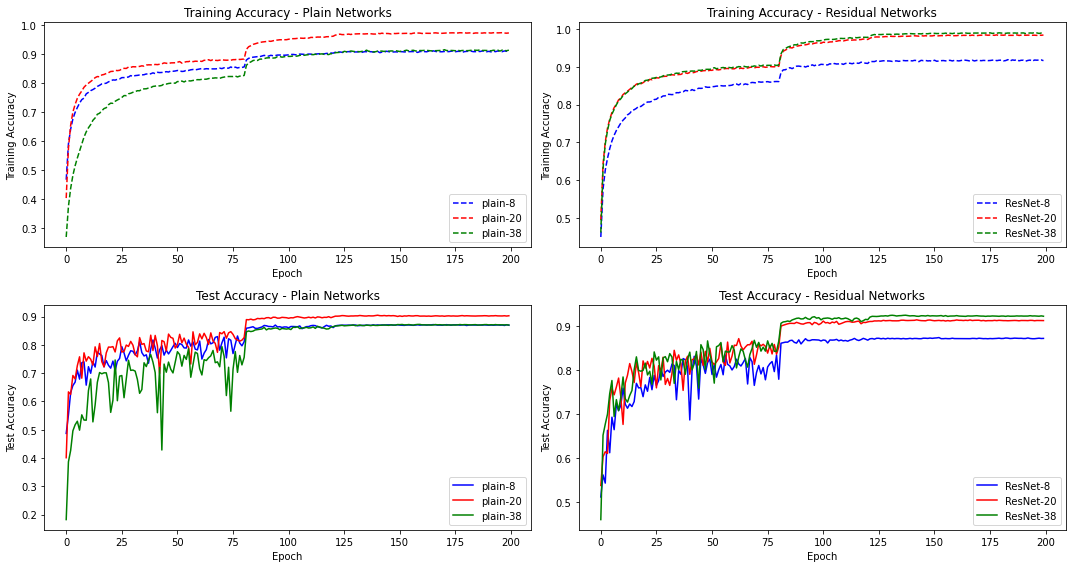

In [0]:
# Plot training & test accuracy for the "plain" models and the ResNet models 
# using the plotting function defined in Section 2.

plt.figure(figsize=(15,8))
plt.subplot(2, 2, 1)
plot_accuracy('Training Accuracy - Plain Networks',
              history_model_claim_2_plain8.history['accuracy'],
              history_model_claim_2_plain20.history['accuracy'],
              history_model_claim_2_plain38.history['accuracy'],
              general=False, training=True)
plt.legend(['plain-8', 'plain-20', 'plain-38'], loc='lower right')

plt.subplot(2, 2, 2)
plot_accuracy('Training Accuracy - Residual Networks',
              history_model_claim_2_resnet8.history['accuracy'],
              history_model_claim_2_resnet20.history['accuracy'],
              history_model_claim_2_resnet38.history['accuracy'],
              general=False, training=True)
plt.legend(['ResNet-8', 'ResNet-20', 'ResNet-38'], loc='lower right')

plt.subplot(2, 2, 3)
plot_accuracy('Test Accuracy - Plain Networks',
              history_model_claim_2_plain8.history['val_accuracy'],
              history_model_claim_2_plain20.history['val_accuracy'],
              history_model_claim_2_plain38.history['val_accuracy'],
              general=False, training=False)
plt.legend(['plain-8', 'plain-20', 'plain-38'], loc='lower right')

plt.subplot(2, 2, 4)
plot_accuracy('Test Accuracy - Residual Networks',
              history_model_claim_2_resnet8.history['val_accuracy'],
              history_model_claim_2_resnet20.history['val_accuracy'],
              history_model_claim_2_resnet38.history['val_accuracy'],
              general=False, training=False)
plt.legend(['ResNet-8', 'ResNet-20', 'ResNet-38'], loc='lower right')

plt.tight_layout()
plt.show()

<br>

The table below summarizes the final accuracies for all 6 models, as well as the number of parameters in these models:

| Depth | Model                      | Test Accuracy           | Training Accuracy       | No. of Parameters     |
|:-----:|:--------------------------:|:-----------------------:|:-----------------------:|:---------------------:|
| 8     | <p>Plain8<br>ResNet8</p>   | <p>86.95%<br>87.26%</p> | <p>90.82%<br>91.63%</p> | <p>76.0k<br>78.6k</p> |
| 20    | <p>Plain20<br>ResNet20</p> | <p>90.30%<br>91.32%</p> | <p>97.26%<br>98.43%</p> | <p>272k<br>274k</p>   |
| 38    | <p>Plain38<br>ResNet38</p> | <p>87.02%<br>92.31%</p> | <p>91.33%<br>98.89%</p> | <p>566k<br>568k</p>   |


### Observations and Explanations

#### Plain Networks
1. The graphs on the LHS and the table above show that the deeper 38-layer "plain" network has lower test and training accuracies, compared to the shallower 20-layer "plain" network. In fact, it performed poorer than the 8-layer "plain" network during the first 120 training epochs, both in terms of training and test accuracies, after which it outperformed the 8-layer "plain" network only marginally. Given that it is about 7.45 times more complex than the 8-layer "plain" networks in terms of the number of parameters, we can safely say that the deepest 38-layer "plain" model has performed poorer than both its shallower counterparts.
1. Looking at the training accuracy curve, the 38-layer "plain" network can be seen as taking much longer to converge to a stable accuracy value, compared to the networks with lower depths. The test accuracy curve of the 38-layer "plain" network also shows that it is much more unstable than its shallower counterparts. During the first 80 training epochs, its test accuracy is very volatile and unstable comparatively, indicating poor generalisability.
1. Here, we have observed the **degradation** problem, the 38-layer "plain" network has higher training error (lower training accuracy) throughout the whole training procedure compared to the shallower 20-layer "plain" network, even though the solution space of the 20-layer "plain" network is a subspace of that of the 38-layer one. 
1. This optimization difficulty is unlikely to be due to vanishing gradients, as even these plain networks are trained with BN, which (from Section 3) ensures forward propagated signals to have non-zero variances [1]. Even backpropagated gradients exhibit healthy norms with BN. Thus, neither forward nor backward signals vanish. 
1. Even with the comparatively poorer performance, the 38-layer "plain" network still managed to achieve rather competitive accuracy (as reported in the table above), implying that the solver does work to some extent. The ResNet paper [1] suggests that very deep plain networks may have exponentially low convergence rates which impact the reducing of the training error. 
1. It is also worth noting that the degradation problem only starts appearing as the network becomes really deep. Going from 8 layers to 20 layers, we could still observe significant improvements in training and test accuracies. 
1. The observations above suggest that indeed, very deep neural networks are subject to the degradation problem, i.e. they suffer from increased depth, and exhibit higher training (and test) errors when going deeper, despite having multiple regularizations put in place to enable better learning. This corroborates the authors in [1]'s claims that such an optimization difficulty is a fundamental problem that hinders practitioners from exploring really deep networks, that could be really beneficial to enrich the "levels" of features.


#### Residual Networks
1. It is important to highlight that the ResNet models have the same baseline architectures as the above "plain" networks, except that a shortcut connection is added to each pair of 3x3 filters. In this report, we use option B as mentioned in [1], i.e. identity mapping for all shortcuts, and projection shortcuts to increase dimensions. These projection shortcuts are the reason behind the slightly more number of parameters for the ResNet models compared to their "plain" counterparts. However, since the increase in the number of parameters is marginal compared to the total number of parameters, and the original paper [1] also highlighted that there is only marginal difference between using zero-padding identity shortcuts and shortcut projections, the comparisons with the corresponding "plain" networks are still fair. 
1. Next, we observe the plots on the RHS, as well as the figures in the table above for the ResNet models. It is clear that the situation observed in "plain" networks is reversed with residual learning. We can see continuous improvement in both, training and test accuracies as the network depth increases - the 38-layer ResNet model outperformed the 20-layer ResNet model which outperformed the 8-layer ResNet model. Importantly, the 38-layer ResNet model exhibits lower training error (higher training accuracy), and is generalizable to the test data, as seen by the improved and stable test accuracy curve, compared to the erratic test accuracy curve for the corresponding 38-layer "plain" network. 
1. Given that every other setting across both "plain" and residual networks are the same, these findings indicate that indeed, the degradation problem is well addressed by the implementation of the shortcut connections. In fact, we are able to obtain accuracy gains from increased depth, again corroborating the claims made by the authors in [1].  
1. Comparing the 38-layer ResNet model to its "plain" counterpart, the ResNet model has further improved the test acuracy by 5.3%, largely due to the successfully reduced training error (as displayed in the table above). This suggests the effectiveness of residual learning on extremely deep systems [1]. 
1. It is also worth noting that when the layers are not so deep (8 and 20 in our case), the ResNet and "plain" models are comparatively accurate, but in all cases, the ResNet models are able to achieve slightly better results for both training and test accuracies. Since the improvements are marginal and the ResNet models do in fact, have slightly more parameters than its plain counterparts, we can say that the models are comparable in terms of performance for shallower networks. 
1. However, the ResNet models do converge slightly faster than their corresponding "plain" networks (the difference in the LHS and RHS scales make it slightly less obvious). When the depth is not too high, the Adam solver is still able to find good solutions for the "plain" networks. Thus, the shortcut connections help to further ease optimization by providing slightly faster convergence, especially at the early stage. 
1. These observations suggest that all claims made by the authors of [1] regarding the benefits of shortcut connections are true, including the last one which suggests that ResNet models are easier to optimize compared to their "plain" counterparts especially as network depth increases. This is proven by the stark difference between the training performances of the 38-layer ResNet and "plain" models, and consequently the performances on the test dataset.


### Why do shortcut connections work?
We now know that indeed, shortcut connections work and they are essential in tackling the degradation problem that arises in really deep neural networks. Thus, it is important for us to understand why these shortcut connections work, enabling the addition of more layers without hurting the performance of the network. 


Consider a "plain" network as depicted in A below which doesn't have any shortcut connections. Here, the input, i.e. X is passed to this Big Neural Network giving activation A1. 


<img src="image/shortcut_exp.png" width="400" height="400" />

<br>

Next, consider a deeper network B whereby a residual block with 2 extra layers and a shortcut connection is added to the previous network, i.e. network A. Now, the activation A1 is passed to the residual block that gives activation A3. Without a shortcut connection, A3 would be:


A3 = ReLU (W2 (A2) + b2)


whereby W2 and b2 are the weights and biases associated with layer 2. However, with a shortcut connection, additional term A1 will be passed to Layer 2. Thus, the equation above is modified to:


A3 = ReLU (W2 (A2) + b2 + A1)


L2 regularization/ weight decay methods will force W2 and b2 to become closer to 0. In the extreme case where these become 0, then we have:


A3 = A1


implying that it is easy for residual blocks to learn identity function. Adding the residual blocks has not increased the model complexity, as it is only copying the previous activation to the next layers. It may also turn out that these additional layers learn something useful - in that case, the performance of the network will also improve. 


Thus, the addition of shortcut connections/ residual blocks has been shown to not hurt the performance of the network, and as a matter of fact, increases the chance that the new layers also learn something useful, giving improved accuracy results, as observed in our analysis above. 

## 5) Investigating Claim 3 - Identity Mappings
After releasing the original ResNet paper [1], the same authors came up with another paper [2] that suggests further to having identity shortcut connections, having identity mappings as skip connections with after-addition activation can ease optimization further and improve regularization, thus reducing risk of overfitting, particularly for really deep neural networks.   


### Identity Mappings - Background [2]
Deep ResNets [1] consist of many residual units/ residual blocks. Each unit (as displayed in image below (a)), has the general form:

$y_l = h(x_l) + F(x_l, W_l)$ --- (1)

$x_{l+1} = f(y_l)$ ---------------- (2)

where $x_l$ and $x_{l+1}$ are the input and output of the $l$-th unit, $F$ is a residual function, i.e. a stack of two 3x3 convolutional layers in [1], and $W_l$ is a set of weights and biases associated with the $l$-th residual unit. As reported in [1], $h(x_l) = x_l$ is an identity mapping and f is a ReLU function. 


The key idea behind this paper is to create a "direct" path for propagating information, not only within a residual unit, but through the entire network. Authors of [2] claim that **if both $h(x_l)$ and $f(y_l)$ are identity mappings, the signal could be directly propagated between units in both forward and backward passes**, thus making training generally easier. The image below shows the original design of a residual unit (a), and the proposed design of a new residual unit (b):


<img src="image/claim3_1.png" width="200" height="200" />

<br>

Authors of [2] claim that keeping a "clean" information path (the grey arrows in the image above) helps in easing optimization. To build an identity mapping $f(y_l) = y_l$, the activation functions (ReLU and BN) are viewed as "pre-activation" of the weight layers, instead of the conventional wisdom of "post-activation". 


$f$ is the operation after element-wise addition, and we have mentioned earlier that in [1], $f$ is ReLU. If $f$ is also an identity mapping in addition to h being identity, i.e. $x_{l+1} ≡ y_l$, then substituting Eqn.(2) into Eqn.(1), we obtain:

$x_{l+1} = x_l + F(x_l, W_l)$ ------ (3)

and by recursion, we'll have:

$x_L = x_l + \sum \limits_{i=l}^{L-1} F(x_i, W_i)$ --- (4)

for any deeper unit L and any shallower unit $l$. Eqn.(4) leads to nice backward propagation properties - if we denote the loss function as $\epsilon$, from the chain rule of backpropagation, we have:

$\frac{\delta \epsilon}{\delta x_l} = \frac{\delta \epsilon}{\delta x_L} \frac{\delta x_L}{\delta x_l} = \frac{\delta \epsilon}{\delta x_L} (1 + \frac{\delta}{\delta x_l} \sum \limits_{i=l}^{L-1} F(x_i, W_i))$ ----- (5)

Eqn.(5) suggests that the gradient $\frac{\delta \epsilon}{\delta x_l}$ can be decomposed into 2 additive terms: (i) $\frac{\delta \epsilon}{\delta x_L}$ that propagates information directly without concerning any weight layers and ensures information is directly propagated back to any shallower unit $l$, and (ii) $\frac{\delta \epsilon}{\delta x_L}(\frac{\delta}{\delta x_l} \sum \limits_{i=l}^{L-1} F(x_i, W_i))$ that propagates through the weight layers. Eqn.(4) and Eqn.(5) suggest that the signal can be directly propagated from any unit to another, both forward and backward. 


Now that we have justified through the series of equations that identity shortcut connections (done in [1]) and identity mapping can improve signal propagation, how do we make $f$ an identity mapping? 


The authors in [2] suggest re-arranging the activation functions (ReLU and/or BN), and they found the arrangement as in the above image (b) to perform the best. In the original ResNet design (Eqn.(1) and Eqn.(2)), the activation $x_{l+1} = f(y_l)$ affects both paths in the next residual unit, i.e. $y_{l+1} = f(y_l) + F(f(y_l), W_{l+1})$. The authors of [2] developed an asymmetric form where an activation $\hat{f}$ only affects the $F$ path, i.e. $y_{l+1} = y_l + F(\hat{f}(y_l), W_{l+1})$, for any $l$ (as depicted in the image below, from (a) to (b)). Renaming the notations, we have:

$x_{l+1} = x_l + F(\hat{f}(x_l), W_{l})$ ----- (6)

It is clear that Eqn.(6) is similar to Eqn.(4), thus can enable a backward formulation that is similar to Eqn.(5). For the new residual unit as formulated in Eqn.(6), the new after-addition activation has become an identity mapping. This design implies that if a new after-addition activation $\hat{f}$ is asymmetrically adopted, it is the same as recasting $\hat{f}$ as the pre-activation of the next residual unit, as illustrated in the image below (from (b) to (c)). 


<img src="image/claim3_2.png" width="500" height="500" />

<br>

The presence of the element-wise addition makes the distinction between post-activation/pre-activation matter. To think about it, if we have a "plain" network with N layers, there are N-1 activations (BN/ReLU), and there is no difference between regarding them as post- or pre-activations. However, for branched layers that are merged by addition (like we have here), the position of activation matters. 


### Methods and General Settings
To evaluate the claim made by [2] that in addition to having identity shortcut connections, having identity mapping, i.e. from $f$=ReLU to $f$=identity will ease optimization further and provide further regularization, we are going to build a similar architecture as the ResNet model in [1] (let's call it ResNet Version 1), but with a few tweaks, to create the identity mapping as in [2]. Below are the tweaks made:
1. Instead of having "Convolutional-BN-ReLU" layers repeated twice in the residual unit but with the second ReLU applied after addition (the shortcut connection), we now have "BN-ReLU-Convolutional" layers repeated twice, and the addition (shortcut connection) is applied after the last Convolutional layer, enabling the formulation of identity mapping, i.e. $f$ = identity.
1. For the first residual unit that follows a stand-alone Convolutional layer, we adopt the first activation right after that Convolutional layer before splitting into two paths.
1. For the last residual unit (followed by average pooling and a fully-connected classifier), we adopt an extra activation right after its element-wise addition. This and the previous tweak are the natural outcome when we obtain the pre-activation network via the modification procedure as depicted in the image above.


The function below (resnet_2) is written to build this second version of ResNet with identity mapping (let's call it ResNet Version 2). Since the settings are exactly the same as the settings for ResNet Version 1 except for the order of the activations, both versions of ResNet models have the same number of parameters for the same depth. Detailed explanations for the architecture are commented in the code cell below.

In [0]:
# Define a function to build ResNet Version 2
def resnet_2(input_shape, depth, num_classes=10):
    '''
    This function builds the second version of the ResNet model. Here, we use 
    identity skip connections whenever possible and only use projection 
    shortcuts to match dimensions (done by 1x1 convolutions). Here, there are 
    2 x (3 x 3) BN-RELU-Conv2D (pre-activation concept).
    
    At the start of each stage, we will halve the feature map size (downsample) 
    by a convolutional layer with strides=2, when the number of filters is doubled,
    so as to preserve the time complexity per layer. The layers have the same 
    number filters and the same filter map sizes within the same stage. 
    
    Features maps sizes:
    stage 0: 32x32, 16
    stage 1: 16x16, 32
    stage 2:  8x8,  64

    Takes as arguments:
    input_shape (tensor): shape of input image tensor
    depth (integer): no. of core convolutional layers
    num_classes (integer): no. of classes (CIFAR-10 has 10)

    Returns model (Model) which is a Keras model instance.
    '''
    
    # Check that the depth inputted is acceptable 
    if (depth - 2) % 6 != 0:
        raise ValueError('depth should be 6n+2 (eg. 20, 32, 44)')
    # Build model
    num_filters = 16
    num_res_blocks = int((depth - 2) / 6)

    inputs = Input(shape=input_shape)
    # As described in paper [2] page 14, this architecture performs
    # Conv2D with BN-ReLU on input before splitting into 2 paths
    x = building_block(inputs=inputs,
                       num_filters=num_filters,
                       conv_first=True)

    # Iterate through the 3 stages and the number of residual blocks 
    for stage in range(3):
        for resi_block in range(num_res_blocks):
            activation = 'relu'
            batch_normalization = True
            strides = 1
            if stage > 0 and resi_block == 0:  # first layer of all stages except the first stage
                strides = 2  # downsample
            if stage == 0 and resi_block == 0:
                activation = None
                batch_normalization = False

            y = building_block(inputs=x,
                               num_filters=num_filters,
                               strides=strides,
                               activation=activation,
                               batch_normalization=batch_normalization,
                               conv_first=False)
            y = building_block(inputs=y,
                               num_filters=num_filters,
                               conv_first=False)  
            
            if stage > 0 and resi_block == 0:  # first layer of all stages except the first stage
                # perform linear projection residual shortcut connection using
                # 1x1 convolution to match changed dimensions
                x = building_block(inputs=x,
                                   num_filters=num_filters,
                                   kernel_size=1,
                                   strides=strides,
                                   activation=None,
                                   batch_normalization=False)
            # addition to implement the skip connection
            x = tensorflow.keras.layers.add([x, y])
            
        # as we go to the next stage, we double num_filters
        num_filters *= 2

    # Again, as mentioned in page 14 for paper [2], 
    # the second version of ResNet model has BN-ReLU before Pooling
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = AveragePooling2D(pool_size=8)(x)
    y = Flatten()(x)
    outputs = Dense(num_classes, activation='softmax', kernel_initializer='he_normal')(y)

    # instantiate model
    model = Model(inputs=inputs, outputs=outputs)
    return model

Since in [2] the authors highlighted that the improvements are only likely to be obvious for really deep networks because the impact of $f$ = ReLU is not severe when the ResNet has fewer layers, we decided to train one ResNet Version 1 model and one ResNet Version 2 model, both with depth = 110 (n = 18). Due to the limited resources available, we are not able to train deeper models. Again, it is important to highlight that the main purpose of this report is not to achieve state-of-the-art results, but rather evaluate the claims made by the authors of the ResNet papers. In the next two code cells, we train ResNet110 Version 1 and then Resnet110 Version 2.

In [0]:
### Train ResNet110 Version 1 ###

# Define depth
depth = 110

# Define the model  
model_claim_3_resnet110 = resnet_1(input_shape=input_shape, depth=depth)

# Compile the model
model_claim_3_resnet110.compile(loss='categorical_crossentropy',
                               optimizer=Adam(lr=learning_rate_schedule(0)),
                               metrics=['accuracy', 'top_k_categorical_accuracy'])
#model_claim_3_resnet110.summary()

# Use the same settings as in Claim 2
# Fit our model on the batches generated by datagen.flow()
history_model_claim_3_resnet110 = model_claim_3_resnet110.fit_generator(datagen.flow(x_train, 
                                        y_train, batch_size=batch_size),
                                        steps_per_epoch= int(x_train.shape[0] / batch_size),
                                        validation_data=(x_test, y_test),
                                        epochs=epochs, 
                                        verbose=1, 
                                        workers=1,
                                        callbacks=callbacks, 
                                        use_multiprocessing=False)

In [0]:
### Train ResNet110 Version 2 ###

# Define the model  
model_claim_3_resnetv2_110 = resnet_2(input_shape=input_shape, depth=depth)

# Compile the model
model_claim_3_resnetv2_110.compile(loss='categorical_crossentropy',
                                   optimizer=Adam(lr=learning_rate_schedule(0)),
                                   metrics=['accuracy', 'top_k_categorical_accuracy'])
#model_claim_3_resnetv2_110.summary()

# Use the same settings as in Claim 2
# Fit our model on the batches generated by datagen.flow()
history_model_claim_3_resnetv2_110=model_claim_3_resnetv2_110.fit_generator(datagen.flow(x_train, 
                                            y_train, batch_size=batch_size),
                                            steps_per_epoch= int(x_train.shape[0] / batch_size),
                                            validation_data=(x_test, y_test),
                                            epochs=epochs, 
                                            verbose=1, 
                                            workers=1,
                                            callbacks=callbacks, 
                                            use_multiprocessing=False)

To evaluate the claims stated above, we will plot the loss and accuracy for both ResNet110 versions to compare their performances, using the plotting functions defined in Section 2.

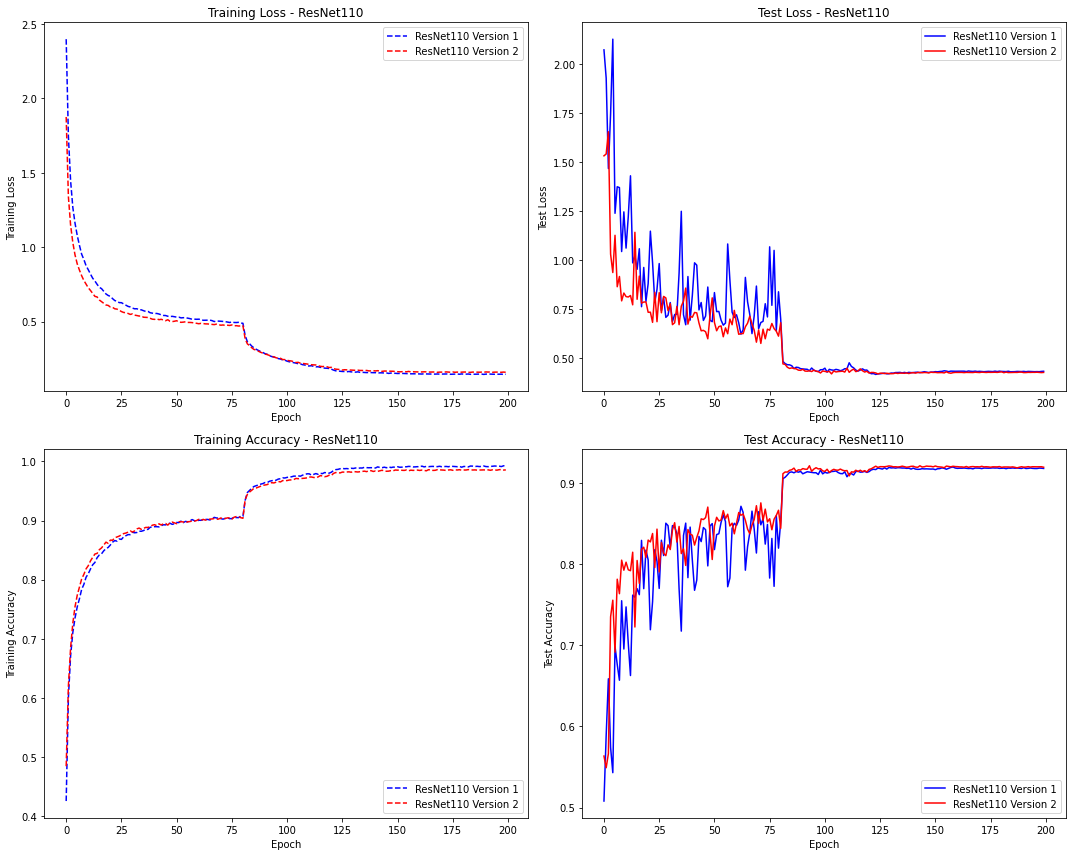

In [0]:
# Plot training & test accuracy / loss values for both versions of ResNet110 models
plt.figure(figsize=(15,12))
plt.subplot(2, 2, 1)
plot_loss('Training Loss - ResNet110',
          history_model_claim_3_resnet110.history['loss'],
          history_model_claim_3_resnetv2_110.history['loss'],
          general=False, training=True)
plt.legend(['ResNet110 Version 1', 'ResNet110 Version 2'], loc='upper right')

plt.subplot(2, 2, 2)
plot_loss('Test Loss - ResNet110',
          history_model_claim_3_resnet110.history['val_loss'],
          history_model_claim_3_resnetv2_110.history['val_loss'],
          general=False, training=False)
plt.legend(['ResNet110 Version 1', 'ResNet110 Version 2'], loc='upper right')

plt.subplot(2, 2, 3)
plot_accuracy('Training Accuracy - ResNet110',
              history_model_claim_3_resnet110.history['accuracy'],
              history_model_claim_3_resnetv2_110.history['accuracy'],
              general=False, training=True)
plt.legend(['ResNet110 Version 1', 'ResNet110 Version 2'], loc='lower right')

plt.subplot(2, 2, 4)
plot_accuracy('Test Accuracy - ResNet110',
              history_model_claim_3_resnet110.history['val_accuracy'],
              history_model_claim_3_resnetv2_110.history['val_accuracy'],
              general=False, training=False)
plt.legend(['ResNet110 Version 1', 'ResNet110 Version 2'], loc='lower right')

plt.tight_layout()
plt.show()

<br>

The table below summarizes the final accuracies/ loss for both models, as well as the number of parameters in these models:

| Model               | Test Accuracy | Training Accuracy| Test loss |Training loss |No. of Parameters|
|:-------------------:|:-------------:|:----------------:|:---------:|:------------:|:---------------:|
| ResNet110 Version 1 | 91.85%        | 99.21%           | 0.4336    | 0.1467       | 1.74mil         |
| ResNet110 Version 2 | 92.00%        | 98.57%           | 0.4277    | 0.1600       | 1.74mil         |


### Observations 
1. Looking at both training loss and training accuracy curves on the LHS of the plot, we could observe that ResNet Version 2 improves training optimization further compared to ResNet Version 1, especially during the beginning of the training until the 80th epoch. Training error is reduced rather slower at the beginning of training for ResNet Version 1. This observation corroborates the claim made by the authors of [2] that optimization with the identity mapping (ResNet Version 2) is further eased (compared to ResNet Version 1). 
1. However, still looking at the same training curves on the LHS of the plot, we could see that while the training curves of the ResNet Version 1 model suffer a little bit at the beginning of training, the curves go into a "healthy status" after around 80 epochs, and they were able to outperform the ResNet Version 2 model, albeit very marginally (as viewed on the curves and the table above). 
1. Looking at the test loss and test accuracy curves on the RHS of the plot, we could clearly observe that the ResNet Version 2 model is much more stable and less erratic compared to the ResNet Version 1 model especially during the first 80 epochs, afterwhich the ResNet Version 2 model continued to outperform the ResNet Version  1 model, as seen in the plot and the table above. 
1. Analyzing observations 2 and 3 together, we could clearly see the additional regularization effect that the ResNet Version 2 model has. Although the ResNet Version 2 model reaches slightly higher training loss (and slightly lower training accuracy) at convergence, this model outperformed the ResNet Version 1 model in terms of test accuracy and test loss, implying better generalisability. This thus corroborates the claim made by the authors of [2] that the introduction of identity mapping reduces overfitting.


### Theories and Explanations
#### How does the introduction of identity mapping help with easing optimization?
1. To explain the first observation that suggests further ease of optimization through the introduction of identify mapping, we look at the function $f$ defined earlier. In ResNet Version 1, $f$ = ReLU, and so the signal is impacted if it is negative, and as the network gets deeper and there are many residual units, this effect becomes more and more prominent. Thus, Eqn.(3) and Eqn.(5) defined earlier are not good approximations. However, when $f$ is an identity mapping, the signal can be propagated directly between any two units, as shown in the equations in the section titled "Identity Mappings - Background [2]".
1. This is also largely why the effect of additional ease of optimization with the introduction of identity mapping is only obvious when the network gets really deep. To explain the second observation above, when the ResNet has fewer layers like in our case here (yes, 110 layers may not be deep enough to show the obvious effect of using identity mapping), the impact of $f$ = ReLU is not severe, as seen in observation 2. The authors claim that this is because after some training, the weights are adjusted into a status such that $y_l$ in Eqn.(1) is more frequently above 0 and $f$ does not truncate it. This is because $x_l$ is always non-negative due to the previous ReLU, so $y_l$ is below 0 only when the magnitude of $F$ is very negative. They claim that the truncation is more frequent when there are 1000 layers. 


#### How does the proposed pre-activation unit reduce overfitting?
1. Addressing observations 3 and 4 above, the authors of [2] suggest that the regularization effect observed is presumably caused by BN's regularization effect. However, the ResNet Version 1 model also has BN layers in the architecture. So how is it different now?
1. In the original residual unit (for ResNet Version 1), although the BN layers normalize the signal, this is then added to the shortcut connection and so, the merged signal is not normalized. Then, this unnormalized signal is used as the input for the next weight layer. However, with our pre-activation in ResNet Version 2, the inputs to all weight layers have been normalized. This thus provides the extra regularization effect that then results in reduced overfitting. 


#### Sidenote
Both ResNet Versions 1 and 2 that we implemented contain 2 projection shortcuts to match the changed dimensions at the beginning of the last two out of three feature map sizes (stages). In the paper [2], the authors claimed to have only used identity shortcut connections throughout, even while changing dimensions (using zero padding). However, we are still able to observe similar results as highlighted in the paper. This is most likely due to the fact that there are only two additional shortcut projections and in total, they only introduced 2,656 extra parameters (which is very small compared to the total of 1.74mil parameters in these models). However, we do not discount the fact that if we had much more than 3 feature map sizes (stages), and thus much more projection shortcuts, the results can be different, as these projection shortcuts can hinder the models from having the most direct paths for information to propagate.

## 6) Potential Improvement to Original ResNet Models - Dropout

Both ResNet papers [1] & [2] followed the BN paper [4] and so did not adopt Dropout in the architectures of both versions of ResNet models. The claim made in the BN paper [4] is that Dropout can be removed or reduced in strength because BN already regularizes the model by introducing noise. Dropout on the other hand, focuses on reducing overfitting. 


In both ResNet papers, the authors said that they used no Dropout and just simply imposed regularization via deep and thin architectures by design, so that they would not distract from the focus on the difficulties of optimization. They claimed to have obtained good results via a simple but essential concept, i.e. going deeper, demonstrating the potential of pushing the limits of depth. However, they did not rule out the possiblity that combining their architecture with stronger regularization such as Dropout may improve results.


Upon further research, we discovered a newly published paper (May, 2019) [6] that successfully incorporated Dropout [7] with some modifications to the ResNet architecture. This paper [6] is based on the idea that whitening the inputs of neural networks can achieve a fast convergence speed. Since previous works done in this field suggest that independent components must be whitened, the authors of [6] introduced a novel concept of Independent-Component (IC) layer before each weight layer, whose inputs would be made more independent. 


Since it is computationally intensive to determine independent components, they proposed combining BN with Dropout in a new manner, such that they rigorously prove that Dropout can quadratically reduce the mutual information and linearly reduce the correlation between any pair of neurons with respect to the Dropout layer parameter $p$. They also claimed that BN should not be placed before ReLU since the non-negative responses of ReLU will cause the weight layer to be updated in a suboptimal manner, and a better performance can be achieved by combining BN and Dropout together as an IC layer. 


### BN + Dropout as an IC layer - Background
#### A) General Idea
(Le Cun et al., 1991) has been advocating the benefits of whitening, but so far it has largely been limited to the preprocessing of input data to a neural network, since it turns out that implementing the whitening idea at every activation layer can be computationally demanding. This resulted in the proposal of BN instead [4]. However, BN does not exactly meet the original goal of whitening. Since the representation power of a neural system increases linearly with the number of independent neurons in the population [6], attempts to make the net activations of each weight layer more independent is highly valuable. 


BN + Dropout (let's regard this as IC layer) can construct independent activations for neurons in each intermediate weight layer. The BN normalizes the net activations so that they have 0 mean and unit variance [4], while Dropout constructs independent activations via the introduction of independent random gates for neurons in a layer [7], that allows neurons outputting value with probability $p$, or shuts them down by outputting 0 otherwise. Thus, the output of a neuron conveys little information from other neurons, becoming statistically independent from each other. 


Traditionally, the ICA (Independent Component Analysis) method is applied to net activations of layers to generate independent components, but this method is too expensive. The newly proposed IC method uses BN to replace the ZCA (Zero-phase Component Analysis) that was used in ICA to decorrelate the input vector, and uses Dropout to replace the rotation operator used in ICA to get the final independent components. 


#### B) Impact of Dropout - quadratically reduce the mutual information and linearly reduce the correlation between any pair of neurons, resulting in a fast convergence speed
The level of dependence between 2 information sources $x$, $y$ can be quantified by their mutual information:

$I(x;y) = \sum \limits_{x,y} P(x,y) log \frac{P(x,y)}{P(x)P(y)}$ ----- (1)

This implies that $x$, $y$ are independent iff $I(x;y)=0$. If we consider a random gate $g_i$ to independently modify the standardized activations $x_i$, which would remain the same with the probability $p$ or set to be 0 otherwise, this theorem is proposed by [6]:

*Theorem 1. Let $g_i$ denote a family of independent random variables generated from the Bernoulli distribution with its mean being $p$. Let $\hat{x_i} = g_ix_i$. Then we have*

$I(\hat{x_i};\hat{x_j}) = p^2 I(x_i, x_j), \forall{i} \neq{j},$


$H(\hat{x_i}) = pH(x_i) + \epsilon_p,$


*where $H$ denotes the Shannon entropy and $\epsilon_p$ the entropy of the Bernoulli distribution.*


Theorem 1 implies that up to a small error $\epsilon_p$, the information contained in a neuron after dropout decays by a factor $p$. In view of the decay factor $p^2$ for the mutual information between neurons, this loss of information is not significant, as we can balance this loss with the independence gain between neurons by choosing an optimal Dropout parameter $p$.


Next, authors of [6] also proved that the estimated correlation coefficient among the standardized activations, $x_i$ and $x_j$ can be rewritten as:

$\hat{c}_{ij} = \frac{1}{\sigma_i \sigma_j} p^2 E(x_i, x_j) = pc_{ij}$ ----- (2)

where $\sigma_i = \sqrt{E(g_ix_i)^2}$ denotes the standard variance of $x_i$. This shows that it is possible to reduce the correlation among activations given by any 2 units by introducing an independent gate for each individual neuron, which dramatically save a lot of computational resources compared with the ZCA / ICA methods. However, the expected activation also decreases. If we consider $x_i$ as an example, its expected value would become $px_i$ if the random gate is open with the probability $p$. Thus, the authors of [6] suggest that *smaller p make units work more independently, but loses more information which should be transferred through the network.*


#### C) Where to place the IC layer in the ResNet architecture?
Now that we have discussed why the IC layer could work, where should we place them in the ResNet architecture? The authors of [6] argued that **the IC layer should be placed before the weight layer instead of the activation layer, and claimed that the ReLU-IC-Convolutional arrangement gave the best results**. They suggested that placing BN right before the activation layer forbids the network parameters from updating in the gradient direction, which is the fastest way to optimize loss, and actually presents a zigzag optimization behaviour. They claimed that this proposed IC layer can achieve more stable training process with faster convergence speed, and improve the generalization performance of the networks. The theoretical proof is presented in the original paper [6].  


### Methods and General Settings
To investigate if adding Dropout to BN could potentially lead to the improvement of the original ResNet model, we are going to build a new ResNet architecture (let's call this ResNet Version 3) whereby all settings are exactly like the previous ResNet architectures, but our residual block/ residual unit no longer consists of two stacks of "Convolutional-BN-ReLU" layers (ResNet Version 1) or "BN-ReLU-Convolutional" layers (ResNet Version 2), but rather two stacks of "ReLU-BN-Dropout-Convolutional" or using the terminology in [6], two stacks of "ReLU-IC-Convolutional" layers. 


We have written two functions as in the code cell below to build the ResNet Version 3 model with Dropout. The first function, building_block2 is very similar to the one in Section 2, but this one has the additional Dropout layer. The second function resnet_3 builds the architecture for ResNet Version 3 using the building_block2 function. The detailed implementation is as commented in the code cell below. In the paper [6], the authors decided on the Dropout parameter $p$ = 0.05. Thus, in our functions below, we are going to set the standard dropout rate to 0.05. However, in the next subsection, we are going to implement the ResNet Version 3 model for different values of $p$ to observe the impact of varying dropout rates. 

In [0]:
# Define a new building block that includes dropout

def building_block2(inputs, dropout_rate, num_filters=16, kernel_size=3, strides=1, 
                    activation='relu', batch_normalization=True, conv_first=True, dropout=True):
  '''
  Arguments:
    inputs (tensor): input from input image or previous layer
    dropout_rate (float) : dropout rate to use
    num_filters (integer): number of filters used for Conv2D
    kernel_size (integer): kernel dimensions for Conv2D
    strides (integer): stride dimensions for Conv2D
    activation (string): name of activation used
    batch_normalization (bool): True - include Batch Normalization, False - otherwise
    conv_first (bool): True - conv-activation-bn-dropout or False - activation-bn-dropout-conv 
    dropout (bool): True - include Dropout, False - otherwise

  Returns a tensor x as input for the next layer.
  '''
  # the original paper [1] used 'he_normal' as the kernel initializer, which draws 
  # samples from a truncated normal distribution - this kernel initializer is typically 
  # used alongside Batch Normalization. The paper also quoted using weight regularizer,
  # which is again what we are using here. 
  convol = Conv2D(num_filters,
                  kernel_size=kernel_size,
                  strides=strides,
                  padding='same',
                  kernel_initializer='he_normal', 
                  kernel_regularizer=l2(1e-4))  

  x = inputs
  if conv_first:
    x = convol(x)
    if activation is not None:
      x = Activation(activation)(x)
    if batch_normalization:
      x = BatchNormalization()(x)
    if dropout:
      x = Dropout(dropout_rate)(x) 
  else:
    if activation is not None:
      x = Activation(activation)(x)
    if batch_normalization:
      x = BatchNormalization()(x)
    if dropout:
      x = Dropout(dropout_rate)(x) 
    x = convol(x)
  return x



# Define a new function to build an improvised version of ResNet using dropout 

def resnet_3(input_shape, depth, num_classes=10, drop_rate=0.05):
    '''
    This function further builds on the architecture of the 2 ResNet versions, 
    but with introduction of Dropout in the architecture. Here, we use 
    identity skip connections whenever possible and only use projection 
    shortcuts to match dimensions (done by 1x1 convolutions). Here, there are 
    2 x (3 x 3) ReLU-BN-Dropout-Conv2D (still pre-activation, but with a
    modification to the order).
    
    At the start of each stage, we will halve the feature map size (downsample) 
    by a convolutional layer with strides=2, when the number of filters is doubled,
    so as to preserve the time complexity per layer. The layers have the same 
    number filters and the same filter map sizes within the same stage. 
    
    Features maps sizes:
    stage 0: 32x32, 16
    stage 1: 16x16, 32
    stage 2:  8x8,  64

    Takes as arguments:
    input_shape (tensor): shape of input image tensor
    depth (integer): no. of core convolutional layers
    num_classes (integer): no. of classes (CIFAR-10 has 10)
    drop_rate (float): the dropout rate

    Returns model (Model) which is a Keras model instance.
    '''
    
    # Check that the depth inputted is acceptable 
    if (depth - 2) % 6 != 0:
        raise ValueError('depth should be 6n+2 (eg. 20, 32, 44)')
    # Build model
    num_filters = 16
    num_res_blocks = int((depth - 2) / 6)

    inputs = Input(shape=input_shape)
    # Conv2D with ReLU-BN-Dropout on input before splitting into 2 paths
    x = building_block2(inputs=inputs,
                        dropout_rate=drop_rate,
                        num_filters=num_filters,
                        conv_first=True)

    # Iterate through the 3 stages and the number of residual blocks 
    for stage in range(3):
        for resi_block in range(num_res_blocks):
            dropout_rate = drop_rate
            activation = 'relu'
            batch_normalization = True
            dropout = True
            strides = 1
            if stage > 0 and resi_block == 0:  # first layer of all stages except the first stage
                strides = 2  # downsample
            if stage == 0 and resi_block == 0:
                activation = None
                batch_normalization = False
                dropout = False

            y = building_block2(inputs=x,
                                dropout_rate = dropout_rate,
                                num_filters=num_filters,
                                strides=strides,
                                activation=activation,
                                batch_normalization=batch_normalization,
                                conv_first=False,
                                dropout=dropout)
            y = building_block2(inputs=y,
                                dropout_rate = dropout_rate,
                                num_filters=num_filters,
                                conv_first=False)  
            
            if stage > 0 and resi_block == 0:  # first layer of all stages except the first stage
                # perform linear projection residual shortcut connection using
                # 1x1 convolution to match changed dimensions
                x = building_block2(inputs=x,
                                    dropout_rate = dropout_rate,
                                    num_filters=num_filters,
                                    kernel_size=1,
                                    strides=strides,
                                    activation=None,
                                    batch_normalization=False,
                                    dropout=False)
            # addition to implement the skip connection
            x = tensorflow.keras.layers.add([x, y])
            
        # as we go to the next stage, we double num_filters
        num_filters *= 2

    # As mentioned in page 6 for paper [6], 
    # adopt an extra activation and IC layers before Pooling
    x = Activation('relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(drop_rate)(x)
    x = AveragePooling2D(pool_size=8)(x)
    y = Flatten()(x)
    outputs = Dense(num_classes, activation='softmax', kernel_initializer='he_normal')(y)

    # instantiate model
    model = Model(inputs=inputs, outputs=outputs)
    return model

To ease comparison with the ResNet Version 1 and ResNet Version 2 models, we are going to train a ResNet Version 3 model for depth = 110 (n=18) as well, and set the dropout rate to 0.05. Every other hyper-parameter settings are exactly as before. 

In [0]:
### Train ResNet110 Version 3 for dropout rate = 0.05 ###

# Define depth
depth = 110

# Define the model  
model_claim_4_resnet110 = resnet_3(input_shape=input_shape, depth=depth)

# Compile the model
model_claim_4_resnet110.compile(loss='categorical_crossentropy',
                                optimizer=Adam(lr=learning_rate_schedule(0)),
                                metrics=['accuracy', 'top_k_categorical_accuracy'])
#model_claim_4_resnet110.summary()

# Use the same settings as in Claim 2
# Fit our model on the batches generated by datagen.flow()
history_model_claim_4_resnet110 = model_claim_4_resnet110.fit_generator(datagen.flow(x_train, 
                                        y_train, batch_size=batch_size),
                                        steps_per_epoch= int(x_train.shape[0] / batch_size),
                                        validation_data=(x_test, y_test),
                                        epochs=epochs, 
                                        verbose=1,
                                        workers=1,
                                        callbacks=callbacks, 
                                        use_multiprocessing=False)

Now that we have trained our model, it's time to compare with the original two versions of ResNet in [1] and [2]. The best way to do this is again by plotting the loss and accuracy results and compare them across the 3 models, as below. 

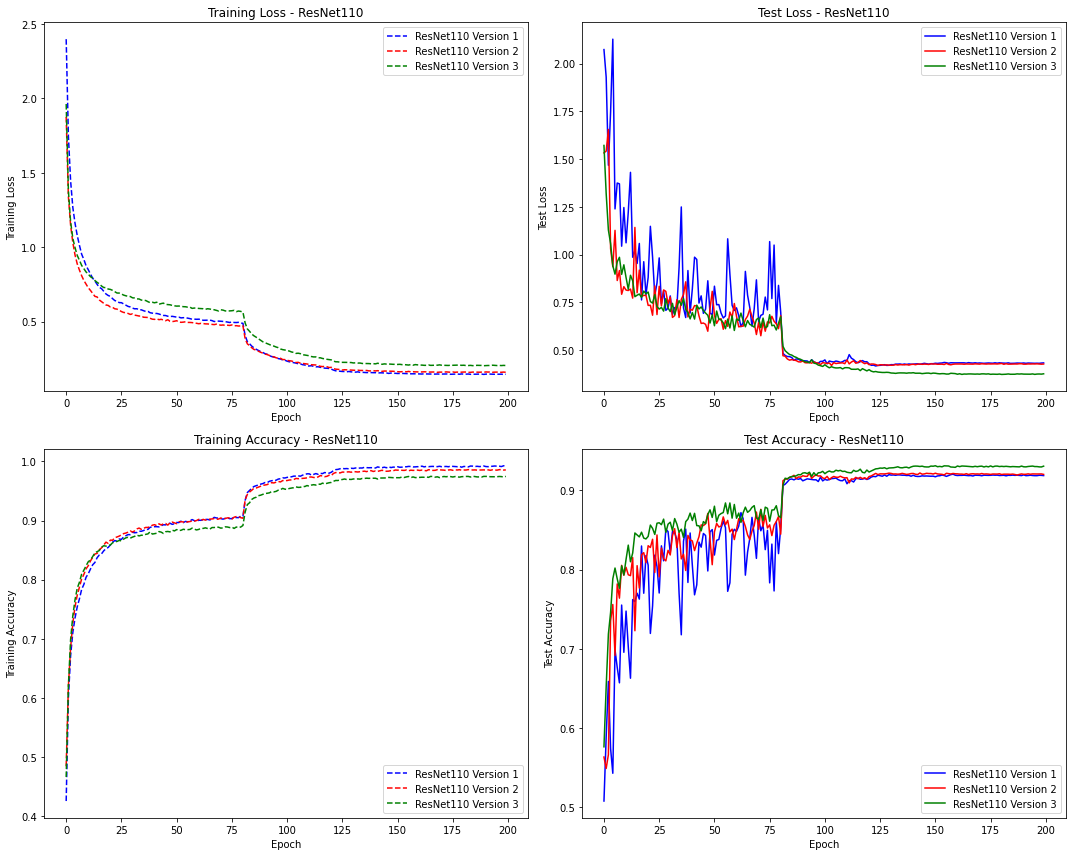

In [0]:
# Plot training & test accuracy / loss values for all three versions of ResNet models
plt.figure(figsize=(15,12))
plt.subplot(2, 2, 1)
plot_loss('Training Loss - ResNet110',
          history_model_claim_3_resnet110.history['loss'],
          history_model_claim_3_resnetv2_110.history['loss'],
          history_model_claim_4_resnet110.history['loss'],
          general=False, training=True)
plt.legend(['ResNet110 Version 1', 'ResNet110 Version 2', 
            'ResNet110 Version 3'], loc='upper right')

plt.subplot(2, 2, 2)
plot_loss('Test Loss - ResNet110',
          history_model_claim_3_resnet110.history['val_loss'],
          history_model_claim_3_resnetv2_110.history['val_loss'],
          history_model_claim_4_resnet110.history['val_loss'],
          general=False, training=False)
plt.legend(['ResNet110 Version 1', 'ResNet110 Version 2', 
            'ResNet110 Version 3'], loc='upper right')

plt.subplot(2, 2, 3)
plot_accuracy('Training Accuracy - ResNet110',
              history_model_claim_3_resnet110.history['accuracy'],
              history_model_claim_3_resnetv2_110.history['accuracy'],
              history_model_claim_4_resnet110.history['accuracy'],
              general=False, training=True)
plt.legend(['ResNet110 Version 1', 'ResNet110 Version 2', 
            'ResNet110 Version 3'], loc='lower right')

plt.subplot(2, 2, 4)
plot_accuracy('Test Accuracy - ResNet110',
              history_model_claim_3_resnet110.history['val_accuracy'],
              history_model_claim_3_resnetv2_110.history['val_accuracy'],
              history_model_claim_4_resnet110.history['val_accuracy'],
              general=False, training=False)
plt.legend(['ResNet110 Version 1', 'ResNet110 Version 2', 
            'ResNet110 Version 3'], loc='lower right')

plt.tight_layout()
plt.show()

<br>

The table below summarizes the final accuracies/ loss for all three models, as well as the number of parameters in these models:

| Model               | Test Accuracy | Training Accuracy| Test loss |Training loss |No. of Parameters|
|:-------------------:|:-------------:|:----------------:|:---------:|:------------:|:---------------:|
| ResNet110 Version 1 | 91.85%        | 99.21%           | 0.4336    | 0.1467       | 1.74mil         |
| ResNet110 Version 2 | 92.00%        | 98.57%           | 0.4277    | 0.1600       | 1.74mil         |
| ResNet110 Version 3 | 93.04%        | 97.47%           | 0.3765    | 0.2053       | 1.74mil         |


### Observations 
1. Looking at both training loss and training accuracy curves on the LHS of the plot, we could see that ResNet Version 3 speeds up training (improves training optimization) at the beginning of the training process. However, still looking at the same training curves on the LHS of the plot, we could observe that while the training curves of the ResNet Version 3 model seem to converge faster at the beginning of the training, the ResNet Versions 1 and 2 models were able to outperform the ResNet Version 3 model in terms of training convergence limits achieved. 
1. If we now observe the test loss and test accuracy curves on the RHS of the plot, the results clearly suggest that the ResNet Version 3 model is much more stable and less erratic, even compared to the already further regularized ResNet Version 2 model, especially during the first 80 epochs. Afterwhich, the ResNet Version 3 model continued to outperform both ResNet Versions 1 and 2 models rather significantly, as seen in the plot and table above. The additional performance improvement brought about by the ResNet Version 3 model is much more than the additional performance improvement brought about by the ResNet Version 2 model. Referring to the table above, from ResNet Version 1 to ResNet Version 2, test accuracy increased by about 0.15%, but from ResNet Version 2 to ResNet Version 3, test accuracy increased by about 1.04%, which is about 7 times more. This is a big achievement!
1. Combining both observations above, we could clearly see the additional regularization effect that the ResNet Version 3 has. Despite reaching slightly higher training loss (and slightly lower training accuracy) at convergence, this model outperformed both the original ResNet Versions 1 and 2 in terms of test accuracy and test loss, implying better generalisability. This suggests that we have indeed successfully incorporated Dropout into the ResNet architecture and the combination of BN and Dropout has certainly improved regularization that in turn results in reduced overfitting due to better generalisability.
1. These findings suggest that indeed, the introduction of Dropout and the newly defined residual unit with the order of the layers as "ReLU-BN-Dropout-Convolutional" in the ResNet architecture has resulted in a much more stable training process, speeds up training at the beginning, and most importantly, better test convergence limits (improved test accuracy/ test loss). 


### Explanations

#### Training speedup
1. Since most of the theory behind these observations are already explained in the section titled "BN + Dropout as an IC layer - Background" above, we are just going to highlight the main points here, to address our findings. Firstly, in subsection B), we have shown that the Dropout layer can quadratically reduce the mutual information and linearly reduce the correlation coefficient between any pair of neurons. This reduction in dependency then results in a faster convergence speed, which is observed in our ResNet Version 3 model at the beginning of training.
1. At the same time, the proposed order of "ReLU-BN-Dropout-Convolutional" layers in the residual unit also plays a part in speeding up training. Previously, the original ResNet models (versions 1 & 2) placed the BN layer right before activation. However, the authors of [6] suggested that this forbids the network parameters from updating in the gradient direction, which is the fastest way to optimize loss. In fact, it actually presents a zigzag optimization behaviour. Changing the order of the layers in the residual units to the one proposed in ResNet Version 3 has been proven theoretically in the paper [6] to result in faster convergence speed.  


#### Improved regularization, stable training process and better test performance
1. Addressing the second and third observations above, the presence of additional regularizer, i.e. Dropout alongside BN introduces more regularization, as compared to the original ResNet models (versions 1 & 2) which only had BN layers. The authors of the Dropout paper [7] have succesfully shown that Dropout significantly reduces overfitting and gives major improvements over other regularization choices. However, when used alongside BN which is another regularizer, one needs to be careful to not choose $p$ which is too high. The authors of [6] decided to go with $p$ = 0.05 for all their "ResNet Version 3" models, and as shown here, this choice has certainly resulted in improved regularization, more stable training process and thus, better performance overall on the test dataset, implying improved generalisability. 
1. The rearrangement of the layers in the residual network plays a big role too. Since in ResNet Version 3 we did not place the BN layer before ReLU activation, we avoided the zigzag optimization behaviour that could potentially impact the optimization behaviour negatively. Here, we are able to see a more stable optimization process, and an overall better test performance. 


### Further Exploration on Dropout Rates, $p$
Building on the points made above regarding both Dropout and BN being regularizers and thus, choosing the right $p$ is crucial to ensure model improvement, we think it's only right that we explore other Dropout rates, to see how they would impact the training and test performances. The main paper that we use as a guide to build the ResNet Version 3 model [6] did not specify why they have chosen $p$ to be equal to 0.05. We conjecture that it has to do with their finding that smaller $p$ makes units work more independently, and also consistent with BN paper [4]' s suggestion to use smaller $p$ when combining Dropout with BN.


[9] on the other hand, implied some disharmony between these two concepts, thus suggested that using them together should be done with caution. Particularly, it is necessary to tune the Dropout parameter $p$ properly, because choosing the wrong $p$ can cause a model's performance to worsen. Below, we train two additional ResNet Version 3 models, with $p$ = 0.1 and $p$ = 0.3, corresponding to Dropout rates of 10% and 30% respectively. Given more time and training resources, we would explore more rates, but because of the long training hours of each of these really deep networks, we decided to stick with these 2 additional rates. The two code cells below train the 2 additional ResNet Version 3 models, both with depth = 110 (n=18) to enable fair comparison.

In [0]:
### Train ResNet110 Version 3 for dropout rate = 0.10 ###

# Define depth
depth = 110

# Define the model  
model_claim_4_resnet110_1 = resnet_3(input_shape=input_shape, depth=depth, drop_rate=0.10)

# Compile the model
model_claim_4_resnet110_1.compile(loss='categorical_crossentropy',
                                  optimizer=Adam(lr=learning_rate_schedule(0)),
                                  metrics=['accuracy', 'top_k_categorical_accuracy'])
#model_claim_4_resnet110_1.summary()

# Use the same settings as in Claim 2
# Fit our model on the batches generated by datagen.flow()
history_model_claim_4_resnet110_1 = model_claim_4_resnet110_1.fit_generator(datagen.flow(x_train, 
                                            y_train, batch_size=batch_size),
                                            steps_per_epoch= int(x_train.shape[0] / batch_size),
                                            validation_data=(x_test, y_test),
                                            epochs=epochs, 
                                            verbose=1, 
                                            workers=1,
                                            callbacks=callbacks, 
                                            use_multiprocessing=False)

In [0]:
### Train ResNet110 Version 3 for dropout rate = 0.30 ###

# Define depth
depth = 110

# Define the model  
model_claim_4_resnet110_2 = resnet_3(input_shape=input_shape, depth=depth, drop_rate=0.30)

# Compile the model
model_claim_4_resnet110_2.compile(loss='categorical_crossentropy',
                                  optimizer=Adam(lr=learning_rate_schedule(0)),
                                  metrics=['accuracy', 'top_k_categorical_accuracy'])
#model_claim_4_resnet110_2.summary()

# Use the same settings as in Claim 2
# Fit our model on the batches generated by datagen.flow()
history_model_claim_4_resnet110_2 = model_claim_4_resnet110_2.fit_generator(datagen.flow(x_train, 
                                            y_train, batch_size=batch_size),
                                            steps_per_epoch= int(x_train.shape[0] / batch_size),
                                            validation_data=(x_test, y_test),
                                            epochs=epochs, 
                                            verbose=1, 
                                            workers=1,
                                            callbacks=callbacks, 
                                            use_multiprocessing=False)

After training these models, we plot the training / test loss and accuracy for all 3 ResNet Version 3 models - with Dropout rates = 0.05, 0.10 and 0.30, to enable comparison. 

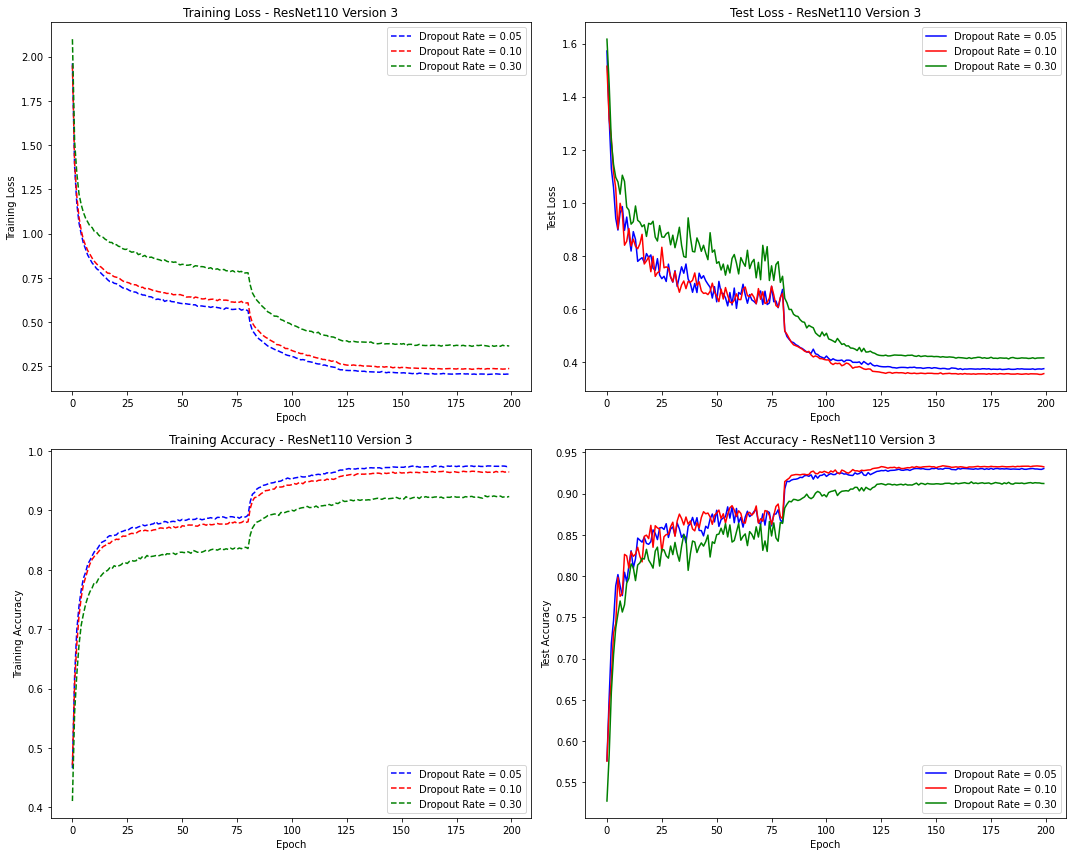

In [0]:
# Plot training & test accuracy / loss values for all three models of ResNet Version 3
plt.figure(figsize=(15,12))
plt.subplot(2, 2, 1)
plot_loss('Training Loss - ResNet110 Version 3',
          history_model_claim_4_resnet110.history['loss'],
          history_model_claim_4_resnet110_1.history['loss'],
          history_model_claim_4_resnet110_2.history['loss'],
          general=False, training=True)
plt.legend(['Dropout Rate = 0.05', 'Dropout Rate = 0.10', 'Dropout Rate = 0.30'], 
           loc='upper right')

plt.subplot(2, 2, 2)
plot_loss('Test Loss - ResNet110 Version 3',
          history_model_claim_4_resnet110.history['val_loss'],
          history_model_claim_4_resnet110_1.history['val_loss'],
          history_model_claim_4_resnet110_2.history['val_loss'],
          general=False, training=False)
plt.legend(['Dropout Rate = 0.05', 'Dropout Rate = 0.10', 'Dropout Rate = 0.30'], 
           loc='upper right')

plt.subplot(2, 2, 3)
plot_accuracy('Training Accuracy - ResNet110 Version 3',
              history_model_claim_4_resnet110.history['accuracy'],
              history_model_claim_4_resnet110_1.history['accuracy'],
              history_model_claim_4_resnet110_2.history['accuracy'],
              general=False, training=True)
plt.legend(['Dropout Rate = 0.05', 'Dropout Rate = 0.10', 'Dropout Rate = 0.30'], 
           loc='lower right')

plt.subplot(2, 2, 4)
plot_accuracy('Test Accuracy - ResNet110 Version 3',
              history_model_claim_4_resnet110.history['val_accuracy'],
              history_model_claim_4_resnet110_1.history['val_accuracy'],
              history_model_claim_4_resnet110_2.history['val_accuracy'],
              general=False, training=False)
plt.legend(['Dropout Rate = 0.05', 'Dropout Rate = 0.10', 'Dropout Rate = 0.30'], 
           loc='lower right')

plt.tight_layout()
plt.show()

<br>

The table below summarizes the final accuracies/ loss for all three models, as well as the number of parameters in these models:

| Model                  | Test Accuracy | Training Accuracy| Test loss |Training loss |No. of Parameters|
|:----------------------:|:-------------:|:----------------:|:---------:|:------------:|:---------------:|
| ResNet110 V3, p = 0.05 | 93.04%        | 97.47%           | 0.3765    | 0.2053       | 1.74mil         |
| ResNet110 V3, p = 0.10 | 93.25%        | 96.45%           | 0.3577    | 0.2369       | 1.74mil         |
| ResNet110 V3, p = 0.30 | 91.23%        | 92.33%           | 0.4171    | 0.3647       | 1.74mil         |


### Observations 
1. Looking at both training loss and training accuracy curves on the LHS of the plot, we could see that increasing the Dropout rates results in higher training loss and lower training accuracy, especially as training progresses after the first few epochs. This effect however, is much smaller when increasing the rate from 5% to 10%, compared to increasing the rate to 30%, which makes sense as our increment in the Dropout rate is not uniform. 
1. However, looking at the test loss and test accuracy curves on the RHS of the plot, the results suggest that increasing the Dropout rate from 5% to 10% for this ResNet Version 3 model with depth=110 can improve the test accuracy and even the test loss is optimized further. Nonetheless, despite this improvement in the generalisability of the model giving better test results and convergence limits, we cannot say that this increase in Dropout rate has stabilized the optimization process further. This is because observing the fluctuations in the test loss and test accuracy curves, the degree of fluctuations seem to be similar, which is understandable given the narrow difference between the 5% and 10% Dropout rates. 
1. However, when we raise the Dropout rate to 30%, we start to see the adverse effect of using BN with high Dropout rates, as warned by the authors of the BN paper [4]. Interestingly, this adverse effect is seen in terms of the much lower overall magnitude of test accuracy and test loss across the epochs, but the stability of the optimization process has not worsened so much, looking at the fluctuations across the test loss and test accuracy curves. 


### Discussion 
It is important to note that this extra exploration of different Dropout rates is not aimed at finding the best Dropout rate that could lead to state-of-the-art performance results for our ResNet110 model. The aim of this exploration is to highlight the importance of tuning the parameter $p$ when building ResNet models with Dropout incorporated. Of course, even in basic CNN architecture it is a good practice to tune this parameter, but here since we are combining Dropout with BN, it is even more important to experiment with different Dropout rates, especially when the aim of the analysis is to achieve state-of-the-art performance results. 

Here, we found that with the 3 options that we have i.e. $p$ = 5%, 10% and 30%, the ResNet110 model gives the best test results when $p$ = 10%. However, this optimal $p$ may vary across different depths. We have also not experimented with a large range of $p$, because we do not have sufficient resources to do so. Here, we are highlighting the importance of comparing across different values for $p$ as the paper that we used as our main reference to build the ResNet Version 3 model did not explore different values of $p$ and used $p$ = 0.05 for all of their models with different depths while claiming a general improvement in results from their overall architecture. A general claim of model improvement without emphasizing the possibility of model worsening when $p$ is set to be too high can be misleading. 

From this mini-analysis, it is clear that if the Dropout rate is set to too high of a value, it would result in poorer model performance. However, the question is, how high is too high? This may be subject to many factors such as the depth of the model and many other architectural features, but perhaps this is an interesting avenue for researchers to explore. 

## 7) Conclusion

We have conducted 4 main analyses throughout this report with the aim to answer the 4 main research questions in Section 1.1. In this section, we summarize the main findings of this report. To ease comparison, we are also including a table below containing the final test accuracies for all models explored (we explored a total of 15 models, but the table below excludes the final figures for VGG-8 Baseline and VGG-8 BN for learning rate = 0.1, as those models are only explored to show BN's ability to train models with high learning rates). 


| Research Question | Model                           | Test Accuracy         | No. of Parameters     |
|:-----------------:|:-------------------------------:|:---------------------:|:---------------------:|
| 1                 |<p>VGG-8 Baseline, lr=0.001<br>VGG-8 BN, lr=0.001</p>|<p>69.08%<br>72.67%</p>| <p>205k<br>206k</p>   |
| 2                 |<p>Plain8<br>ResNet8<br>Plain20<br>ResNet20<br>Plain38<br>ResNet38</p>|<p>86.95%<br>87.26%<br>90.30%<br>91.32%<br>87.02%<br>92.31%</p>|<p>76.0k<br>78.6k<br>272k<br>274k<br>566k<br>568k</p>    |
| 3                 |<p>ResNet110 V1<br>ResNet110 V2</p>|<p>91.85%<br>92.00%</p>|<p>1.74mil<br>1.74mil</p>|
| 4                 |<p>ResNet110 V3, p=5%<br>**ResNet110 V3, p=10%**<br>ResNet110 V3, p=30%</p>|<p>93.04%<br>**93.25%**<br>91.23%</p>|<p>1.74mil<br>1.74mil<br>1.74mil</p>|


### Research Question 1
From our first analysis, we found that adding BN to a CNN architecture (VGG-8 in our experiment) does provide training speedup. We discovered that this is largely due to the technique's ability to reduce the *Internal Covariate Shift* problem by normalizing layer inputs for each training mini-batch. These normalization layers between the fully connected layers result in the range of each layer's input distribution to stay the same regardless of changes in the previous layer. This way, layers in the network are able to learn from the BackPropagation process simultaneously, without the need to wait for the previous layer to finish learning first. Such normalization speeds up convergence, even when the features are not decorrelated, and this is how BN speeds up the training of networks. 

BN also introduces noise to the data since the normalization is performed just on the mini-batches instead of the whole dataset, thus resulting in some form of regularization. This regularization then helps in reducing generalization error, resulting in better test accuracy, as observed in our analysis (table above, Research Question 1 - introduction of BN improved test accuracy by 3.6% in the VGG-8 model with learning rate = 0.001). Finally, we found that adding BN helps in training models with higher learning rates. By normalizing activations throughout the network, BN prevents small changes to the parameters from amplifying into larger and suboptimal changes in activations in gradients, while making training more resilient to the parameter scale. Thus, BackPropagation through a layer is unaffected by the scale of its parameters for a model with BN. This is how we are able to use much higher learning rates with BN, without worrying about vanishing/ exploding gradient problem.


### Research Question 2
From our second analysis, we discovered that using shortcut connections helps in overcoming the degradation problem, thus enabling accuracy gains from considerably increased depth. We noticed the degradation problem in the "plain" networks, whereby as the depth of the network becomes considerably deeper (38 in our experiment), test accuracy started getting saturated and then degraded rapidly from depth of 20 to depth of 38 (test accuracy dropped by 3.28%). However, the opposite is true for the ResNet models with shortcut connections - they experience continuous improvement to the models as depth increases, even enabling accuracy gains from the considerable increase in depth (test accuracy improved by 5.05% going from ResNet8 to ResNet38). In fact, comparing the ResNet38 model to its "plain" counterpart, the ResNet model has further improved the test acuracy by 5.3%, suggesting the effectiveness of residual learning on extremely deep systems.

We also discovered that residual networks are easier to optimize than their corresponding plain network counterparts as network depth increases. When the depth of the network is not too deep (8 and 20 in our case), the ResNet and "plain" models are comparatively accurate. However, the ResNet models do converge slightly faster than their corresponding "plain" networks in these shallower networks. When the depth is not too high, the Adam solver is still able to find good solutions for the "plain" networks. Thus, the shortcut connections in this case, help to further ease optimization by providing slightly faster convergence, especially at the early stage. However, as the depth gets higher (38 in our case), we could observe that the ResNet38 model is much easier to optimize than the Plain38 model, suggesting that the shortcut connections ease optimization further as network depth increases. 


### Research Question 3
Moving to our third analysis, we found that in addition to having shortcut connections, having identity mapping helps to ease optimization further in much deeper neural networks. We observed that ResNet110 V2 improved training optimization further compared to ResNet110 V1, especially during the beginning of training. However, we also noticed that while the training curves of ResNet110 V1 suffered a bit at the beginning of training, the curves went into a "healthy status" afterwards, and they were able to outperform the ResNet110 V2 model very marginally. This is because when $f$ = ReLU (as in ResNet110 V1), the propagation signal is impacted if it is negative, and as the network gets deeper and there are many residual units, this effect becomes more and more prominent. However, when $f$ is an identity mapping, the signal can be propagated directly between any two units, easing optimization further. This is also largely why the effect of additional ease of optimization with the introduction of identity mapping is only obvious when the network gets really deep. When the ResNet is not too deep (110 layers is deep, but not "too deep"), the impact of $f$ = ReLU is not severe, thus explaining why we are only able to see further training optimization at the beginning of training but not throughout the entire course of training for ResNet110 V2, compared to ResNet110 V1. 

Besides, we also discovered that the introduction of identity mapping also helps in reducing the risk of overfitting through the introduction of more regularization. The test curves for ResNet110 V2 is much more stable and less erratic compared to the test curves for ResNet110 V1, suggesting the additional regularization effect of identity mapping. The former also outperformed the latter marginally in terms of final test accuracies (92% test accuracy for ResNet110 V2 compared to 91.85% test accuracy for ResNet110 V1), implying better generalisability and reduced overfitting. We found that in the original residual unit (ResNet Version 1), although the BN layers normalize the signal, this is then added to the shortcut connection and so, the merged signal is not normalized. Then, this unnormalized signal is used as the input for the next weight layer. However, with our pre-activation in ResNet Version 2, the inputs to all weight layers have been normalized. This thus provides the extra regularization effect that then results in reduced overfitting.


### Research Question 4
Finally, we found that introducing Dropout does help in improving the performance of the ResNet architecture, although caution must be exercised when choosing the Dropout rate ($p$) - $p$ should not be "too high" as this may impact the model's performance negatively. In this part of analysis, we not only introduced Dropout into the ResNet architecture, but we also rearranged the layers in the residual unit to "ReLU-BN-Dropout-Convolutional". We found three main effects of doing this, i.e. training speedup, improved regularization which leads to a more stable training process, and better test performance. 

To explain the results observed, we discovered that the Dropout layer can quadratically reduce the mutual information and linearly reduce the correlation coefficient between any pair of neurons. This reduction in dependency then results in a faster convergence speed, which is observed in our ResNet110 V3 model with $p$ = 0.05, at the beginning of training. At the same time, the proposed order of "ReLU-BN-Dropout-Convolutional" layers in the residual unit also plays a part in speeding up training. The original ResNet models (versions 1 & 2) placed the BN layer right before activation, forbidding the network parameters from updating in the gradient direction, which is the fastest way to optimize loss. Changing the order of the layers in the residual units to the one proposed in ResNet Version 3 has been proven theoretically in the paper [6] to result in faster convergence speed.

The addition of Dropout to the architecture alongside BN has led to improved regularization (leading to a more stable optimization) and better test performance, as both techniques introduce regularization to the architecture. The rearrangement of the layers in the residual network plays a big role too. Since in ResNet Version 3 we did not place the BN layer before ReLU activation, we avoided the zigzag optimization behaviour that could potentially impact optimization negatively. Here, we are able to see a more stable optimization process, and an overall better test performance. Our ResNet110 V3 model with $p$ = 0.05 managed to improve the test accuracy of ResNet110 V2 model by more than 1% (93.04% compared to 92.00%), which is a big achievement given the high depth of the networks. 

Since two of our reference papers [4] and [9] suggested that one needs to be careful to not choose $p$ which is too high when using Dropout alongside BN as it could worsen our model's performance instead of improving it, we experimented with different Dropout rates to investigate this claim. We found that for a ResNet model with depth = 110, raising $p$ to 10% from 5% would still improve the test performance, but when $p$ is raised to 30%, we began to see the model worsening. This suggests the need to carefully tune the parameter $p$, and the theory behind the effect of different Dropout rates on models with BN could be an interesting avenue for researchers to explore further. 

Finally, if we look at the test accuracy numbers in the table above, we could see that the test accuracy dropped from 92.31% to 91.85% going from ResNet38 to ResNet110 (both version 1). Even the improved model ResNet110 V2 achieved 92.00% test accuracy, which is still lower than the 92.31% achieved by the ResNet38 model (version 1). This suggests the possibility of overfitting, especially since our not so large CIFAR-10 dataset may not require such high model depth. However, with the introduction of Dropout in ResNet110 V3, our test accuracy improved quite substantially, even with the high depth. Our ResNet110 V3 model with p = 10% achieved a 93.25% test accuracy, which surpassed the test accuracies of all the other models, suggesting that indeed, Dropout can be useful (when the right $p$ is chosen) to reduce overfitting and thus, improve generalisability. 


### Final Remarks 
Given more computational and time resources, we would experiment more rigorously by exploring more variations of network depth and other potential architectural improvements. It is also a good practice to run each model version multiple times and observe the average results to eliminate the effect of small random fluctuations when running the models, giving more concrete results. 

ResNet is one of the most talked about architectural breakthrough in CNN, and up till now, there is still ongoing work on potential model improvements. An interesting follow up of this report would be to explore the ResNeXt architecture proposed by Facebook Research, that as the name suggests, is an extension of the ResNet architecture. What's different about ResNexts is the adding of parallel towers/ branches/paths within each module (which has also been explored by the Inception network). It would be interesting to explore how the modified architecture would perform against the original architectures of ResNet [1] and [2]. 

## 8) References 

* [1] He, K., Zhang, X., Ren, S., Sun, J.: Deep residual learning for image recognition. In: CVPR. (2016)
* [2] He, K., Zhang, X., Ren, S., Sun, J.: Identity Mappings in Deep Residual Networks. In: CVPR. (2016)
* [3] Atienza, R., 2020. Advanced Deep Learning With Tensorflow 2 And Keras. 2nd ed. Birmingham: Packt Publishing, Limited.
* [4] S. Ioffe and C. Szegedy. Batch normalization: Accelerating deep network training by reducing internal covariate shift. In ICML, 2015.
* [5] Ilango, R., 2018. Batch Normalization — Speed Up Neural Network Training. [online] Medium. Available at: <https://medium.com/@ilango100/batch-normalization-speed-up-neural-network-training-245e39a62f85> [Accessed 3 May 2020].
* [6] Chen, G., Chen, P., Shi, Y., Hsieh, C., Liao, B., Zhang, S. Rethinking the Usage of Batch Normalization and Dropout in the Training of Deep Neural Networks. arXiv preprint arXiv:1905.05928v1, 2019.
* [7] Srivastava, Nitish, Hinton, Geoffrey E, Krizhevsky, Alex, Sutskever, Ilya, and Salakhutdinov, Ruslan. Dropout: a simple way to prevent neural networks from overfitting. Journal of Machine Learning Research, 15(1):1929–1958, 2014.
* [8] K. Simonyan and A. Zisserman. Very deep convolutional networks for large-scale image recognition. In ICLR, 2015.
* [9] Li, X., Chen, S., Hu, X., and Yang, J. Understanding the disharmony between dropout and batch normalization by variance shift. arXiv preprint arXiv:1801.05134, 2018.